In [1]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#from statsmodels.stats.proportion import proportions_ztest
import pylab
#import hddm
#import kabuki
from functions import *
import researchpy as rp

# Data Formatting

In [2]:
# load data from directory
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [3]:
# change from .mat to dataframe
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

In [4]:
flashdata

array([[ 1.        ,  2.        ,  2.        ,  1.        ,  2.88056174],
       [ 1.        ,  2.        ,  2.        ,  1.        ,  1.72637588],
       [ 1.        ,  3.        ,  0.        ,  1.        ,  1.34160629],
       ...,
       [15.        ,  3.        ,  3.        ,  0.        ,  0.05721071],
       [15.        ,  3.        ,  3.        ,  1.        ,  0.18629772],
       [15.        ,  3.        ,  3.        ,  1.        ,  0.07555925]])

In [5]:
# rename columns and separate by condition/task
flashframe = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

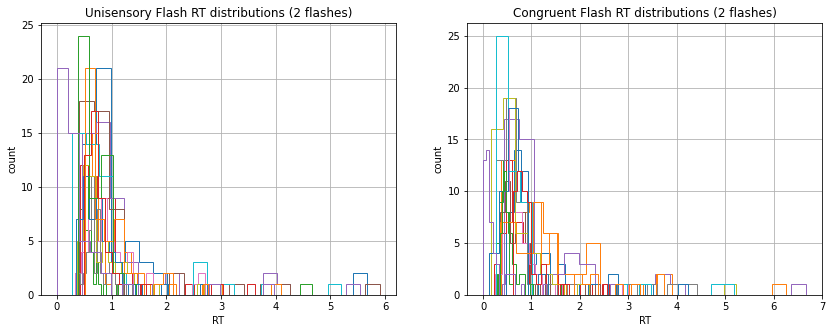

In [6]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (2 flashes)')
for i, subj_data in unif.loc[unif['flashpres'] == 2].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (2 flashes)')
for i, subj_data in congrf.loc[congrf['flashpres'] == 2].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

#plt.close()

(0.0, 30.0)

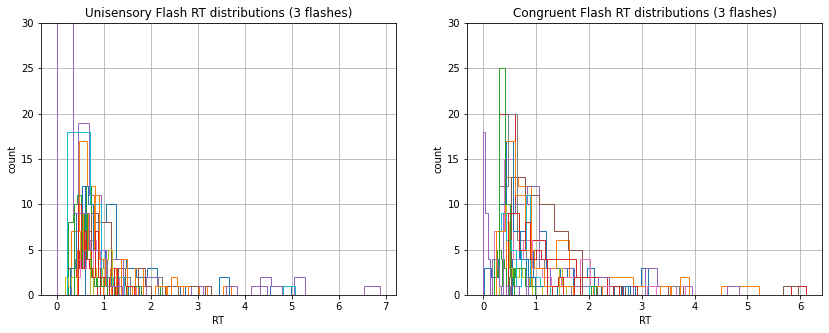

In [7]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (3 flashes)')
for i, subj_data in unif.loc[unif['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 30])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (3 flashes)')
for i, subj_data in congrf.loc[congrf['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 30])
#plt.close()

# Plots

In [8]:
# remove subj 15 because of outlier/superhuman data
subject1 = 15
#subject2 = [7, 9, 10]

flashframe = droprow(flashframe, 0.05)
#flashframe = droprow(flashframe, 0.15)
flashframe = dropsubj(flashframe, subject1)
flashframe = droprow(flashframe, 10, False)
beepframe = droprow(beepframe, 0.05)
#beepframe = droprow(beepframe, 0.15)
beepframe = dropsubj(beepframe, subject1)
beepframe = droprow(beepframe, 10, False)

#for i in subject2:
#    flashframe = dropsubj(flashframe, i)
#    beepframe = dropsubj(beepframe, i)

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

In [9]:
from matplotlib.offsetbox import AnchoredText
#for i in np.arange(max(unif['subj_idx'])):
#    plotbars(unif, unib, congrf, congrb, "(Subj " + str(int(i + 1)) + ") % Correct", 
#             "(Subj " + str(int(i + 1)) + ") mean RT", int(i + 1))

#plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")
def plotbars(flashuni, beepuni, flashcongr, beepcongr, title, width, subjid = -1):
    if (subjid != -1):
        flashuni = flashuni.loc[flashuni['subj_idx'] == subjid]
        beepuni = beepuni.loc[beepuni['subj_idx'] == subjid]
        flashcongr = flashcongr.loc[flashcongr['subj_idx'] == subjid]
        beepcongr = beepcongr.loc[beepcongr['subj_idx'] == subjid]
        
    ## % correct plot
    flashuniacc = flashuni['acc'].mean()
    beepuniacc = beepuni['acc'].mean()
    flashcongracc = flashcongr['acc'].mean()
    beepcongracc = beepcongr['acc'].mean()
    #allcongracc = (flashcongracc + beepcongracc) / 2
    
    if(subjid == -1):
        fig = plt.figure(figsize=(8,5)) 
        ax = fig.add_subplot(111)
    else:
        fig = plt.figure(figsize=(12,5)) 
        ax = fig.add_subplot(121)
    ax.set_xlabel('condition', fontsize = 22)
    ax.set_ylabel('% correct', fontsize = 22)
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)

    objects = ('Unisensory \nVisual',  'Bisensory \nVisual', 'Unisensory \nAuditory', 'Bisensory \nAuditory')
    #y_pos = np.arange(len(objects))
    performance = [flashuniacc, flashcongracc, beepuniacc, beepcongracc]
    
    def label_diff(i,j,text,X,Y,k = 1):
        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':20,'shrinkB':20,'linewidth':1}
        if k == 0:
            x = (X[i]+X[j])/2
            y = 1.05*max(Y[i], Y[j])
            dx = abs(X[i]-X[j])
            ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
            ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        else:
            x = (X[i]+X[j])/2
            y = 1.05*max(Y[i], Y[j])
            dx = abs(X[i]-X[j])
            ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
            ax.annotate('', xy=(X[i], y - 0.15), xytext=(X[j], y - 0.15), arrowprops=props)
        
    
    
    y_pos = [0,1,3,4]
    if(subjid == -1):
        '''
        flashuniaccerr = calcstderr(flashuni, 'acc')
        beepuniaccerr = calcstderr(beepuni, 'acc')
        flashcongraccerr = calcstderr(flashcongr, 'acc')
        beepcongraccerr = calcstderr(beepcongr, 'acc')
        #allcongraccerr = (flashcongraccerr + beepcongraccerr) / 2
        y_pos = [0,1,3,4]
        plt.bar(y_pos, performance, yerr=[flashuniaccerr, flashcongraccerr, beepuniaccerr, beepcongraccerr], 
                color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        label_diff(0, 1, "***", range(5), performance, 0)
        

        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        plt.ylim([0, 1.5])
        '''
        colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
        '''
        box_dict = plt.boxplot([flashuni.groupby(by = ['subj_idx']).mean()['acc'], 
                                flashcongr.groupby(by = ['subj_idx']).mean()['acc'], 
                                beepuni.groupby(by = ['subj_idx']).mean()['acc'], 
                                beepcongr.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1,3,4], showfliers = False)
        for item in ['whiskers', 'caps']:
            for sub_items, color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                plt.setp(sub_items, color=color)
        for item in ['boxes', 'medians', 'means', 'fliers']:
            for sub_item, color in zip(box_dict[item], colors):
                plt.setp(sub_item, color=color, markeredgecolor=color)
                
        label_diff(0, 1, "***", range(5), performance, 0)
        

        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        plt.ylim([0, 1.5])
        '''
        
        vplot = plt.violinplot([flashuni.groupby(by = ['subj_idx']).mean()['acc'], 
                                flashcongr.groupby(by = ['subj_idx']).mean()['acc'], 
                                beepuni.groupby(by = ['subj_idx']).mean()['acc'], 
                                beepcongr.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1,3,4])
        for patch, color in zip(vplot['bodies'], colors):         
            patch.set_color(color)
            patch.set_edgecolor(color)
        label_diff(0, 1, "***", range(5), performance, 0)
        label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2), 0)

        at = AnchoredText("***  p < 0.001\n        N = 14",
                      prop=dict(size=14), frameon=True,
                      loc='lower right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        plt.ylim([0, 1.5])
        
    else:
        
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        plt.ylim([0,1])
    plt.xticks(y_pos, objects)
    
    plt.tight_layout()
    if (subjid == -1):
        plt.savefig('accuracy.png', bbox_inches = 'tight')
    
    ## mean rt plot, only want accurate trials
    flashunirt = flashuni.loc[flashuni['acc'] == 1]['rt'].mean()
    beepunirt = beepuni.loc[beepuni['acc'] == 1]['rt'].mean()
    flashcongrrt = flashcongr.loc[flashcongr['acc'] == 1]['rt'].mean()
    beepcongrrt = beepcongr.loc[beepcongr['acc'] == 1]['rt'].mean()
    #allcongrrt = (flashcongrrt + beepcongrrt) / 2
    

    if (subjid == -1):
        fig = plt.figure(figsize=(8,5)) 
        ax = fig.add_subplot(111)
    else:
        ax = fig.add_subplot(122)
    ax.set_xlabel('condition', fontsize = 22)
    ax.set_ylabel('response time (s)', fontsize = 22)
    objects = ('Unisensory \nVisual',  'Bisensory \nVisual', 'Unisensory \nAuditory', 'Bisensory \nAuditory')
    y_pos = [0,1,3,4] 
    performance = [flashunirt, flashcongrrt, beepunirt, beepcongrrt]
    if (subjid == -1):
        '''
        flashunirterr = calcstderr(flashuni, 'rt')
        beepunirterr = calcstderr(beepuni, 'rt')
        flashcongrrterr = calcstderr(flashcongr, 'rt')
        beepcongrrterr = calcstderr(beepcongr, 'rt')
        #allcongrrterr = (flashcongrrterr + beepcongrrterr) / 2
        plt.bar(y_pos, performance, yerr=[flashunirterr, flashcongrrterr, beepunirterr, beepcongrrterr], 
                color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        label_diff(0, 1, "***", range(5), performance)
        label_diff(3, 4, "***", range(5), [flashunirt, flashcongrrt, 0, beepunirt, beepcongrrt])
        
        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        '''
        
        vplot = plt.violinplot([flashuni.groupby(by = ['subj_idx']).mean()['rt'], 
                                flashcongr.groupby(by = ['subj_idx']).mean()['rt'], 
                                beepuni.groupby(by = ['subj_idx']).mean()['rt'], 
                                beepcongr.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1,3,4])
        for patch, color in zip(vplot['bodies'], colors):         
            patch.set_color(color)
            patch.set_edgecolor(color)
            
        label_diff(0, 1, "n.s.", range(5), [max(flashuni.groupby(by = ['subj_idx']).mean()['rt']), 
                                            max(flashcongr.groupby(by = ['subj_idx']).mean()['rt']), 
                                            max(beepuni.groupby(by = ['subj_idx']).mean()['rt']), 
                                            max(beepcongr.groupby(by = ['subj_idx']).mean()['rt'])], 1)
        label_diff(3, 4, "n.s.", range(5), [max(flashuni.groupby(by = ['subj_idx']).mean()['rt']), 
                                            max(flashcongr.groupby(by = ['subj_idx']).mean()['rt']), 
                                            0,
                                            max(beepuni.groupby(by = ['subj_idx']).mean()['rt']), 
                                            max(beepcongr.groupby(by = ['subj_idx']).mean()['rt'])], 1)
        
        at = AnchoredText("N = 14",
                      prop=dict(size=14), frameon=True,
                      loc='lower right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        '''
        colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
        box_dict = plt.boxplot([flashuni.groupby(by = ['subj_idx']).mean()['rt'], 
                                flashcongr.groupby(by = ['subj_idx']).mean()['rt'], 
                                beepuni.groupby(by = ['subj_idx']).mean()['rt'], 
                                beepcongr.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1,3,4], showfliers = False)
        for item in ['whiskers', 'caps']:
            for sub_items, color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                plt.setp(sub_items, color=color)
        for item in ['boxes', 'medians', 'means', 'fliers']:
            for sub_item, color in zip(box_dict[item], colors):
                plt.setp(sub_item, color=color, markeredgecolor=color)
        '''
        
        '''
        label_diff(0, 1, "***", range(5), [np.quantile(flashuni['rt'], 0.75) + 1.5*(np.quantile(flashuni['rt'], 0.75) - np.quantile(flashuni['rt'], 0.25)), 
                                           np.quantile(flashcongr['rt'], 0.75) + 1.5*(np.quantile(flashcongr['rt'], 0.75) - np.quantile(flashcongr['rt'], 0.25)), 0, 
                                           np.quantile(beepuni['rt'], 0.75) + 1.5*(np.quantile(beepuni['rt'], 0.75) - np.quantile(beepuni['rt'], 0.25)), 
                                           np.quantile(beepcongr['rt'], 0.75) + 1.5*(np.quantile(beepcongr['rt'], 0.75) - np.quantile(beepcongr['rt'], 0.25))])
        label_diff(3, 4, "***", range(5), [np.quantile(flashuni['rt'], 0.75) + 1.5*(np.quantile(flashuni['rt'], 0.75) - np.quantile(flashuni['rt'], 0.25)), 
                                           np.quantile(flashcongr['rt'], 0.75) + 1.5*(np.quantile(flashcongr['rt'], 0.75) - np.quantile(flashcongr['rt'], 0.25)), 0, 
                                           np.quantile(beepuni['rt'], 0.75) + 1.5*(np.quantile(beepuni['rt'], 0.75) - np.quantile(beepuni['rt'], 0.25)), 
                                           np.quantile(beepcongr['rt'], 0.75) + 1.5*(np.quantile(beepcongr['rt'], 0.75) - np.quantile(beepcongr['rt'], 0.25))])
        
        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        '''
        plt.tight_layout()
        plt.gcf().subplots_adjust(bottom=0.25)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        plt.suptitle(title, fontsize = 15)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.xticks(y_pos, objects)
    plt.ylim([0,2])
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)
    
    if (subjid == -1):
        plt.savefig('mean_rt.png', bbox_inches = 'tight')
    else:
        plt.savefig('subj' + str(int(i + 1)) + '.png')
        print('subj ', subjid,  beepuniacc, beepcongracc)


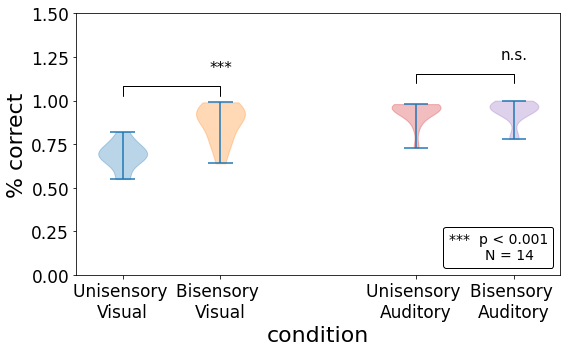

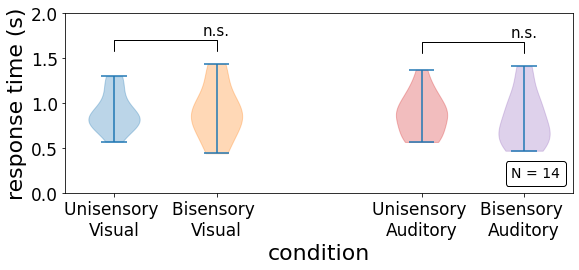

In [10]:
plotbars(unif.loc[unif['subj_idx'] != 15], unib.loc[unib['subj_idx'] != 15], 
         congrf.loc[congrf['subj_idx'] != 15], congrb.loc[congrb['subj_idx'] != 15],
        "", width = 0.65)

subj  1 0.98 0.95
subj  2 0.91 0.92
subj  3 0.97 0.94
subj  4 0.73 0.78
subj  5 0.85 0.7878787878787878
subj  6 0.98 0.9797979797979798
subj  7 0.97 0.96
subj  8 0.97 0.99
subj  9 0.96 0.99
subj  10 0.96 0.9595959595959596
subj  11 0.96 0.95
subj  12 0.93 0.96
subj  13 0.92 0.98
subj  14 0.97 1.0


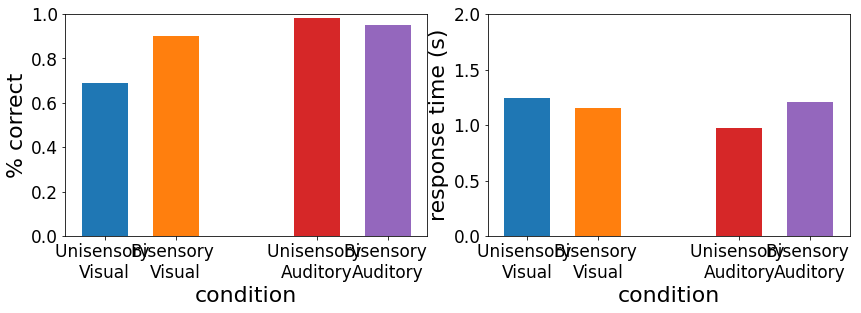

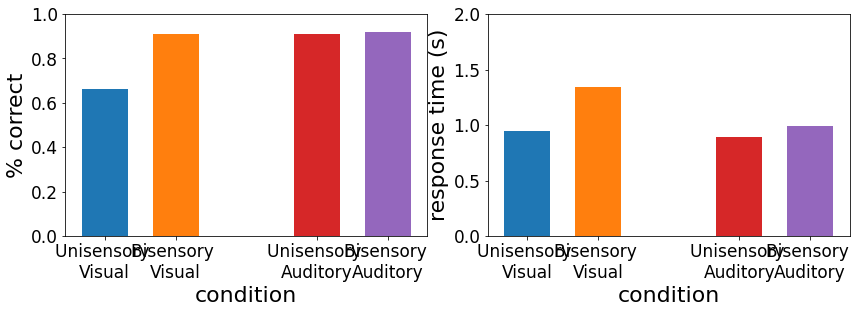

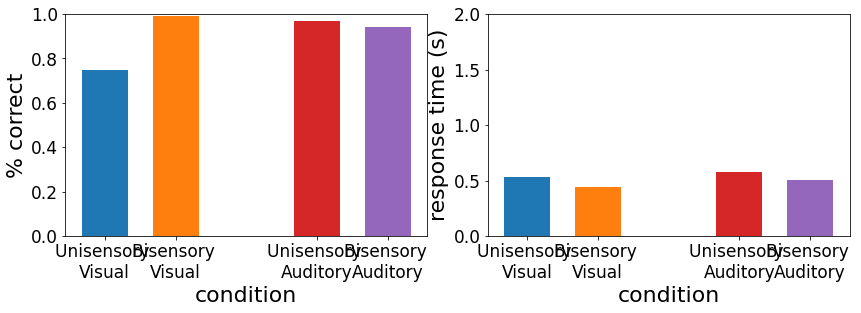

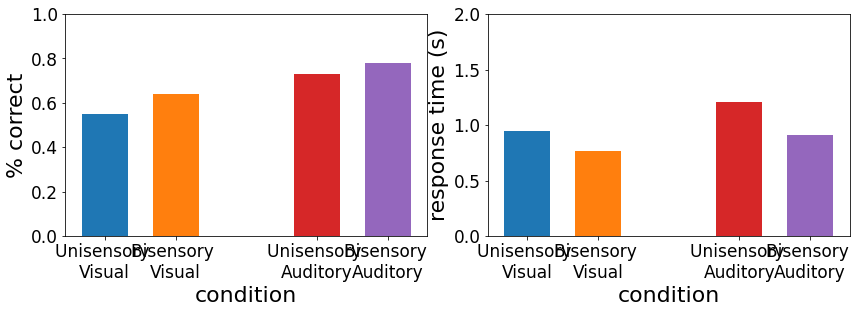

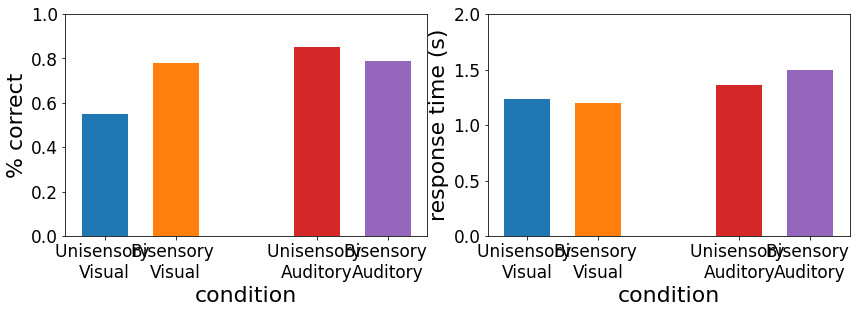

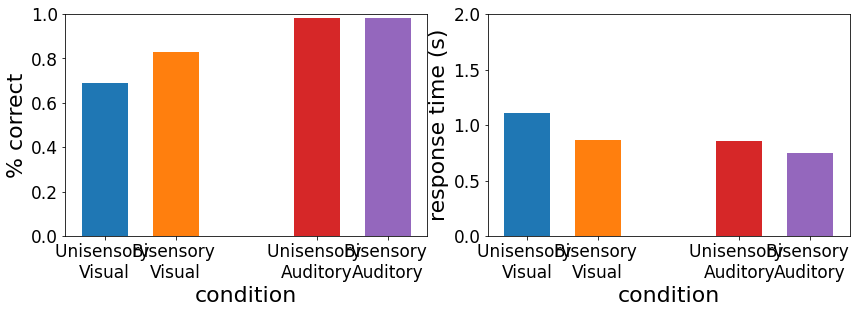

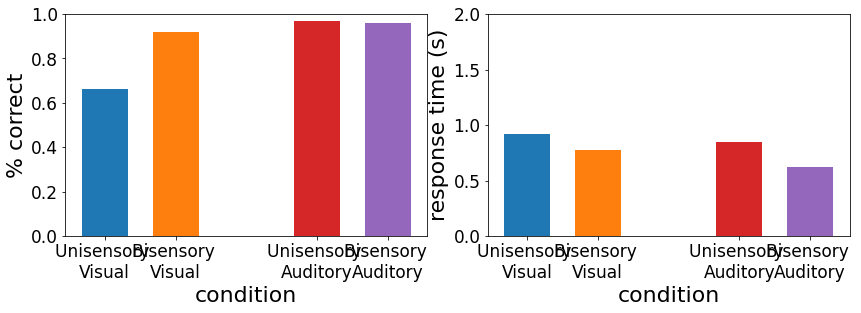

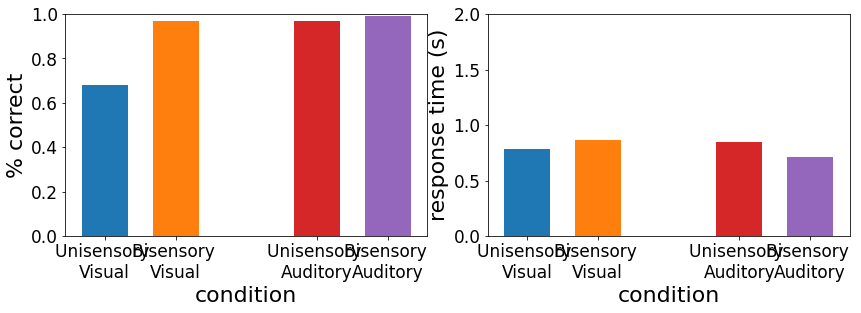

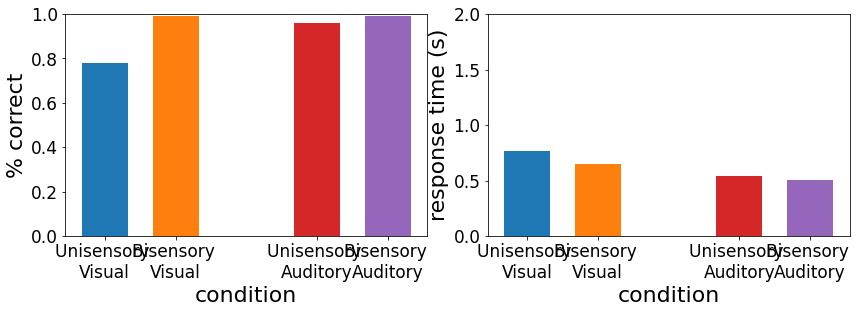

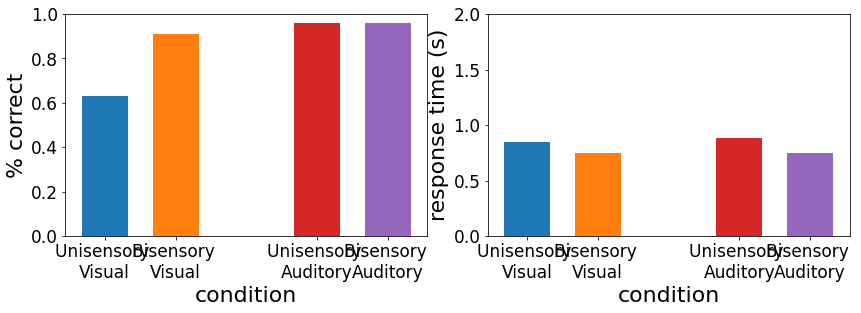

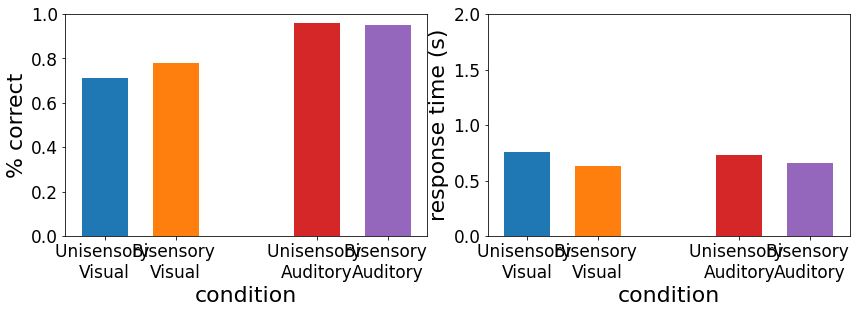

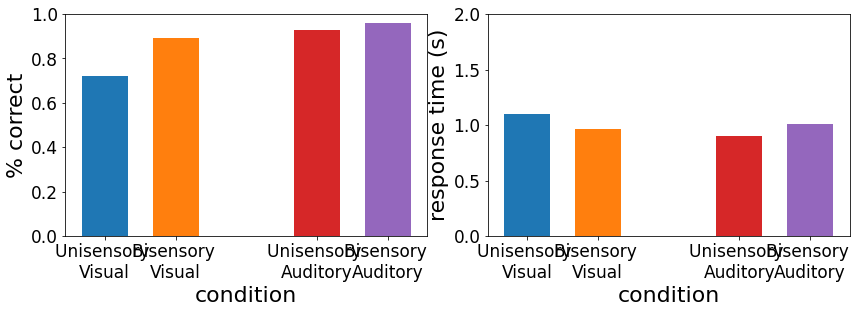

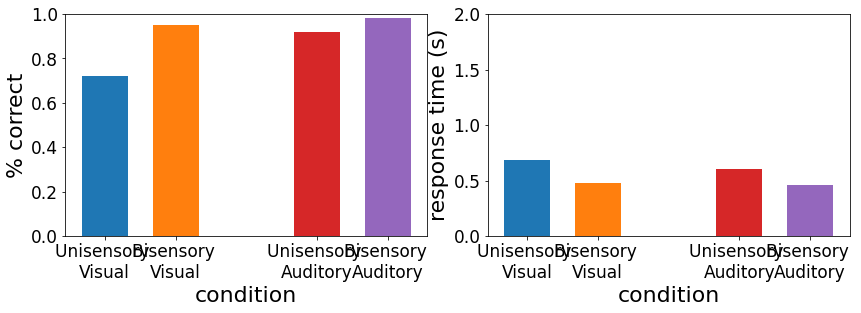

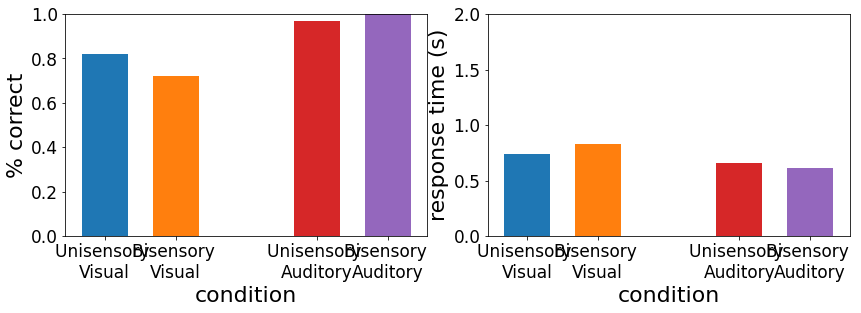

In [11]:
for i in range(1, 15):
    plotbars(unif.loc[unif['subj_idx'] != 15], unib.loc[unib['subj_idx'] != 15], 
         congrf.loc[congrf['subj_idx'] != 15], congrb.loc[congrb['subj_idx'] != 15],
        "", width = 0.65, subjid = i)

### test for improvements between conditions(2nd paragraph of auditory task)


In [12]:
#stats.ttest_rel(np.array([0.01, 0.05, 0.02, 0.03, 0.03, 0.06, 0.03]), np.array([-0.03, -0.03, -0.06, -0.01, -0.01, 0, 0.01]))
stats.f_oneway(np.array([-0.03, -0.06]), np.array([0.05, 0.02, 0.03, 0.06, 0.03]), np.array([0.01, -0.03, -0.01, -0.01, 0, -0.01, 0.03]))

F_onewayResult(statistic=16.277518475301445, pvalue=0.0005163553040954883)

In [13]:
#stats.f_oneway(congrf['acc'], unif['acc'], congrb['acc'], unib['acc'])

In [14]:
#stats.f_oneway(congrf['rt'], unif['rt'], congrb['rt'], unib['rt'])

# Pairwise t-tests

Conduct t-test between accuracy or rt across all subjects (1400 pairs in each test, 100 from each subject)

## Comparing accuracy for flash trials (unisensory vs. bisensory)

### tried both t test and proportions test and ended up going with proportions

In [15]:
unif.groupby(by='subj_idx').mean()['acc']

subj_idx
1.0     0.69
2.0     0.66
3.0     0.75
4.0     0.55
5.0     0.55
6.0     0.69
7.0     0.66
8.0     0.68
9.0     0.78
10.0    0.63
11.0    0.71
12.0    0.72
13.0    0.72
14.0    0.82
Name: acc, dtype: float64

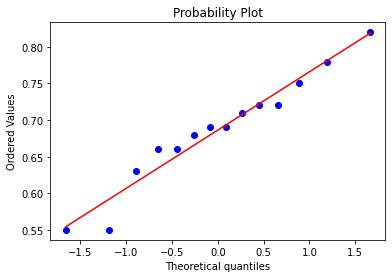

In [16]:
stats.probplot(unif.groupby(by='subj_idx').mean()['acc'], dist = "norm", plot = pylab)
pylab.show()

In [17]:
stats.kstest(unif.groupby(by='subj_idx').mean()['acc'], 'norm')

KstestResult(statistic=0.7088403132116536, pvalue=1.308567513820784e-07)

In [18]:
unif.groupby(by='subj_idx').mean()['acc'].mean()

0.6864285714285715

In [19]:
print(stats.ttest_rel(unif.groupby(by='subj_idx').mean()['acc'], congrf.groupby(by='subj_idx').mean()['acc']))
rp.ttest(unif.groupby(by='subj_idx').mean()['acc'], congrf.groupby(by='subj_idx').mean()['acc'], paired = True)

Ttest_relResult(statistic=-6.510813000833226, pvalue=1.970081244147918e-05)


(  Variable     N      Mean        SD        SE  95% Conf.  Interval
 0      acc  14.0  0.686429  0.076118  0.020343   0.642479  0.730378
 1      acc  14.0  0.869841  0.105904  0.028304   0.808694  0.930989
 2     diff  14.0 -0.183413  0.105404  0.028170  -0.244271 -0.122554,
        Paired samples t-test  results
 0  Difference (acc - acc) =   -0.1834
 1      Degrees of freedom =   13.0000
 2                       t =   -6.5108
 3   Two side test p value =    0.0000
 4  Difference < 0 p value =    0.0000
 5  Difference > 0 p value =    1.0000
 6               Cohen's d =   -2.0153
 7               Hedge's g =   -1.9566
 8           Glass's delta =   -2.4096
 9             Pearson's r =    0.8748)

In [20]:
nobs = np.array([len(unif), len(unif)])
counts = np.array([int(sum(unif['acc'])), int(sum(congrf['acc']))])
proportions_ztest(counts, nobs)

NameError: name 'proportions_ztest' is not defined

## Comparing accuracy for beep trials (unisensory vs. bisensory)

In [21]:
print(stats.ttest_rel(unib.groupby(by='subj_idx').mean()['acc'], congrb.groupby(by='subj_idx').mean()['acc']))
rp.ttest(unib.groupby(by='subj_idx').mean()['acc'], congrb.groupby(by='subj_idx').mean()['acc'], paired = True)

Ttest_relResult(statistic=-0.6956385757909697, pvalue=0.49890282573871547)


(  Variable     N      Mean        SD        SE  95% Conf.  Interval
 0      acc  14.0  0.932857  0.068436  0.018290   0.893343  0.972371
 1      acc  14.0  0.939091  0.069225  0.018501   0.899122  0.979060
 2     diff  14.0 -0.006234  0.033530  0.008961  -0.025593  0.013126,
        Paired samples t-test  results
 0  Difference (acc - acc) =   -0.0062
 1      Degrees of freedom =   13.0000
 2                       t =   -0.6956
 3   Two side test p value =    0.4989
 4  Difference < 0 p value =    0.2495
 5  Difference > 0 p value =    0.7505
 6               Cohen's d =   -0.0906
 7               Hedge's g =   -0.0879
 8           Glass's delta =   -0.0911
 9             Pearson's r =    0.1894)

In [22]:
nobs = np.array([len(unib), len(congrb)])
counts = np.array([int(sum(unib['acc'])), int(sum(congrb['acc']))])
proportions_ztest(counts, nobs)

NameError: name 'proportions_ztest' is not defined

## Comparing rt for flash trials (unisensory vs. bisensory)

In [23]:
unif.groupby(by='subj_idx').mean()['rt'].mean()

0.9081895621500381

In [24]:
print(stats.wilcoxon(unif.groupby(by='subj_idx').mean()['rt'], congrf.groupby(by='subj_idx').mean()['rt']))
print(rp.ttest(unif.groupby(by='subj_idx').mean()['rt'], congrf.groupby(by='subj_idx').mean()['rt'], paired = True, equal_variances = False))

WilcoxonResult(statistic=40.0, pvalue=0.463134765625)
  Wilcoxon signed-rank test    results
0            Mean for rt =    0.908190
1            Mean for rt =    0.904847
2                W value =   40.000000
3                Z value =   -0.784700
4      Two sided p value =    0.463100
5                      r =   -0.148300


In [25]:
# effect size
-0.784700 / np.sqrt(14)

-0.2097198965286794

## Comparing rt for beep trials (unisensory vs. bisensory)

In [26]:
stats.wilcoxon(unib.groupby(by='subj_idx').mean()['acc'], congrb.groupby(by='subj_idx').mean()['acc'])
print(rp.ttest(unib.groupby(by='subj_idx').mean()['rt'], congrb.groupby(by='subj_idx').mean()['rt'], paired = True, equal_variances = False))

  Wilcoxon signed-rank test    results
0            Mean for rt =    0.881617
1            Mean for rt =    0.832600
2                W value =   32.000000
3                Z value =   -1.286900
4      Two sided p value =    0.216600
5                      r =   -0.243200


In [27]:
# effect size
-1.2869 / np.sqrt(14)

-0.34393849221709893

# HDDM

In [28]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['subj_idx', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)

In [29]:
model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [30]:
model_unif['type'] = 'u'
model_congrf['type'] = 'c'
model_f = pd.concat([model_unif, model_congrf], axis = 0)
model_unib['type'] = 'u'
model_congrb['type'] = 'c'
model_b = pd.concat([model_unib, model_congrb], axis = 0)

In [31]:
flashdata = np.empty((1,6))
beepdata = np.empty((1,6))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['respMatF'], mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['respMatB'], mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

stimFdata = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'response', 'acc', 'rt'])
stimBdata = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'response', 'acc', 'rt'])

In [32]:
stimFdata.loc[stimFdata['response'] == 90, 'response'] = 0
stimFdata.loc[stimFdata['response'] == 91, 'response'] = 1
stimBdata.loc[stimBdata['response'] == 90, 'response'] = 0
stimBdata.loc[stimBdata['response'] == 91, 'response'] = 1

congrfstim = stimFdata.loc[stimFdata['flashpres'] == stimFdata['beeppres']]
unifstim = stimFdata.loc[stimFdata['beeppres'] == 0]
congrbstim = stimBdata.loc[stimBdata['flashpres'] == stimBdata['beeppres']]
unibstim = stimBdata.loc[stimBdata['flashpres'] == 0]

congrfstim = congrfstim.assign(trialtype = 'c')
#df1.loc[:,'f'] = pd.Series(np.random.randn(sLength), index=df1.index) = 'c'
unifstim = unifstim.assign(trialtype = 'u')
congrbstim = congrbstim.assign(trialtype = 'c')
unibstim = unibstim.assign(trialtype = 'u')


In [33]:
# 0 means responded 2, 1 means responded 3
def stimcode(df, conditions, choices):
    dframe = df.copy()
    dframe['stimCode'] = np.select(conditions, choices)
    return(dframe)

unifstim = stimcode(unifstim, [(unifstim['response'] == 0) & (unifstim['acc'] == 0), 
                                  (unifstim['response'] == 0) & (unifstim['acc'] == 1),
                                  (unifstim['response'] == 1) & (unifstim['acc'] == 0),
                                  (unifstim['response'] == 1) & (unifstim['acc'] == 1)], [1, 0, 0, 1])
congrfstim = stimcode(congrfstim, [(congrfstim['response'] == 0) & (congrfstim['acc'] == 0), 
                                      (congrfstim['response'] == 0) & (congrfstim['acc'] == 1),
                                      (congrfstim['response'] == 1) & (congrfstim['acc'] == 0),
                                      (congrfstim['response'] == 1) & (congrfstim['acc'] == 1)], [1, 0, 0, 1])
unibstim = stimcode(unibstim, [(unibstim['response'] == 0) & (unibstim['acc'] == 0), 
                                  (unibstim['response'] == 0) & (unibstim['acc'] == 1),
                                  (unibstim['response'] == 1) & (unibstim['acc'] == 0),
                                  (unibstim['response'] == 1) & (unibstim['acc'] == 1)], [1, 0, 0, 1])
congrbstim = stimcode(congrbstim, [(congrbstim['response'] == 0) & (congrbstim['acc'] == 0), 
                                      (congrbstim['response'] == 0) & (congrbstim['acc'] == 1),
                                      (congrbstim['response'] == 1) & (congrbstim['acc'] == 0),
                                      (congrbstim['response'] == 1) & (congrbstim['acc'] == 1)], [1, 0, 0, 1])

In [34]:
stim_f = pd.concat([unifstim, congrfstim], axis = 0)
stim_b = pd.concat([unibstim, congrbstim], axis = 0)
stim_f = stim_f.drop(stim_f[stim_f['subj_idx'] == 15].index)
stim_b = stim_b.drop(stim_b[stim_b['subj_idx'] == 15].index)

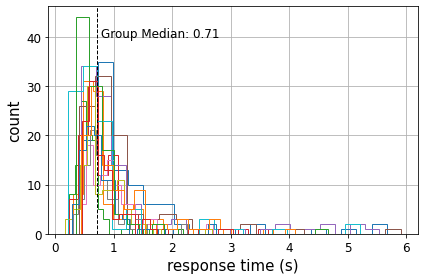

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.rcParams["axes.grid"] = False
for i, subj_data in model_unif.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.axvline(model_unif['rt'].median(), color='black', linestyle='dashed', linewidth=1)
plt.text(model_unif['rt'].median()*1.1, 40, 'Group Median: {:.2f}'.format(model_unif['rt'].median()), fontsize = 12)

plt.xlabel('response time (s)', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()

plt.savefig('flashuni_rt.png')
plt.show()

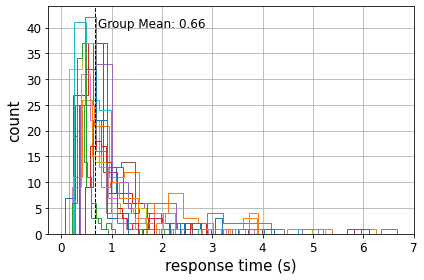

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, subj_data in model_congrf.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.axvline(model_congrf['rt'].median(), color='black', linestyle='dashed', linewidth=1)
plt.text(model_congrf['rt'].median()*1.1, 40, 'Group Mean: {:.2f}'.format(model_congrf['rt'].median()), fontsize = 12)

plt.xlabel('response time (s)', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()

plt.savefig('flashcon_rt.png')
plt.show()

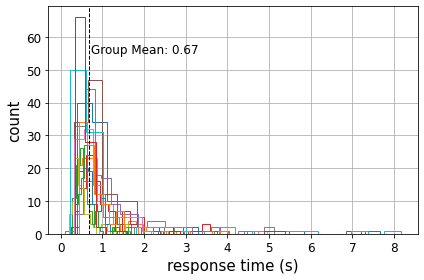

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, subj_data in model_unib.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.axvline(model_unib['rt'].median(), color='black', linestyle='dashed', linewidth=1)
plt.text(model_unib['rt'].median()*1.1, 55, 'Group Mean: {:.2f}'.format(model_unib['rt'].median()), fontsize = 12)

plt.xlabel('response time (s)', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()

plt.savefig('beepuni_rt.png')
plt.show()

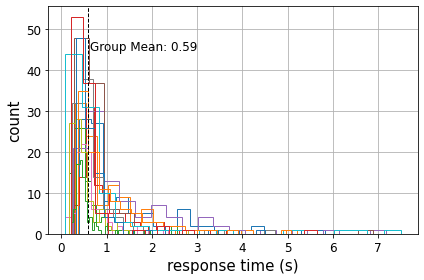

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, subj_data in model_congrb.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.axvline(model_congrb['rt'].median(), color='black', linestyle='dashed', linewidth=1)
plt.text(model_congrb['rt'].median()*1.1, 45, 'Group Mean: {:.2f}'.format(model_congrb['rt'].median()), fontsize = 12)

plt.xlabel('response time (s)', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()

plt.savefig('beepcon_rt.png')
plt.show()

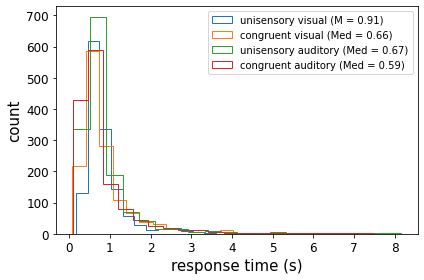

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.rcParams["axes.grid"] = None
#for i, subj_data in model_unif.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
model_unif.rt.hist(bins = 20, histtype = 'step', ax = ax, label = 'unisensory visual (M = 0.91)')
#plt.axvline(model_unif['rt'].mean(), color='black', linestyle='dashed', linewidth=1)
#plt.text(model_unif['rt'].mean()*1.1, 500, 'Group Mean: {:.2f}'.format(model_unif['rt'].mean()), fontsize = 12)

model_congrf.rt.hist(bins = 20, histtype = 'step', ax = ax, label = 'congruent visual (Med = 0.66)')
#plt.axvline(model_congrf['rt'].mean(), color='black', linestyle='dashed', linewidth=1)
#plt.text(model_congrf['rt'].mean()*1.1, 500, 'Group Mean: {:.2f}'.format(model_congrf['rt'].mean()), fontsize = 12)

model_unib.rt.hist(bins = 20, histtype = 'step', ax = ax, label = 'unisensory auditory (Med = 0.67)')
#plt.axvline(model_unib['rt'].mean(), color='black', linestyle='dashed', linewidth=1)
#plt.text(model_unib['rt'].mean()*1.1, 500, 'Group Mean: {:.2f}'.format(model_unib['rt'].mean()), fontsize = 12)

model_congrb.rt.hist(bins = 20, histtype = 'step', ax = ax, label = 'congruent auditory (Med = 0.59)')
#plt.axvline(model_congrb['rt'].mean(), color='black', linestyle='dashed', linewidth=1)
#plt.text(model_congrb['rt'].mean()*1.1, 500, 'Group Mean: {:.2f}'.format(model_congrb['rt'].mean()), fontsize = 12)

plt.xlabel('response time (s)', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.legend()

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()
ax.grid(b=None)

plt.savefig('flashuni_rt.png')
plt.show()

## d prime and beta calculations

In [40]:
unifhits = np.zeros(14)
uniffalsealarms = np.zeros(14)
unifdprime = np.zeros(14)
unifbeta = np.zeros(14)
for i in np.arange(14):
    unifhits[i] = float(len(unif.loc[(unif['flashpres'] == 2) & (unif['acc'] == 1) & (unif['subj_idx'] == (i + 1))])) / len(unif.loc[(unif['flashpres'] == 2) & (unif['subj_idx'] == (i + 1))])
    uniffalsealarms[i] = float(len(unif.loc[(unif['flashpres'] == 3) & (unif['acc'] == 0) & (unif['subj_idx'] == (i + 1))])) / len(unif.loc[(unif['flashpres'] == 3) & (unif['subj_idx'] == (i + 1))])
    
    unifhits = np.where(unifhits == 1, (1 - 0.01), unifhits)
    uniffalsealarms = np.where(uniffalsealarms == 0, 0.01, uniffalsealarms)
    
    unifdprime[i] = stats.norm.ppf(unifhits[i]) - stats.norm.ppf(uniffalsealarms[i])
    unifbeta[i] = 0.5*(stats.norm.ppf(unifhits[i]) + stats.norm.ppf(uniffalsealarms[i]))

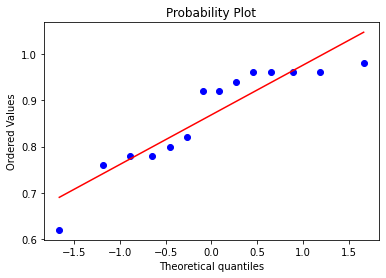

KstestResult(statistic=0.6502185485738271, pvalue=2.596644770449883e-06)

In [41]:
stats.probplot(unifhits, dist = "norm", plot = pylab)
pylab.show()
stats.kstest(unifhits, 'logistic')

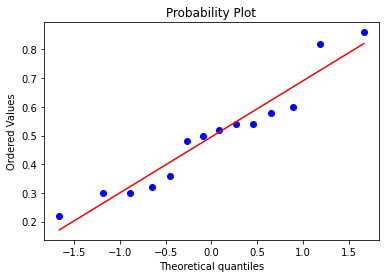

KstestResult(statistic=0.5547792351072148, pvalue=0.00013969841043838437)

In [42]:
stats.probplot(uniffalsealarms, dist = "norm", plot = pylab)
pylab.show()
stats.kstest(uniffalsealarms, 'logistic')

In [43]:
congrfhits = np.zeros(14)
congrffalsealarms = np.zeros(14)
congrfdprime = np.zeros(14)
congrfbeta = np.zeros(14)
for i in np.arange(14):
    congrfhits[i] = float(len(congrf.loc[(congrf['flashpres'] == 2) & (congrf['acc'] == 1) & (congrf['subj_idx'] == (i + 1))])) / len(congrf.loc[(congrf['flashpres'] == 2) & (congrf['subj_idx'] == (i + 1))])
    congrffalsealarms[i] = float(len(congrf.loc[(congrf['flashpres'] == 3) & (congrf['acc'] == 0) & (congrf['subj_idx'] == (i + 1))])) / len(congrf.loc[(congrf['flashpres'] == 3) & (congrf['subj_idx'] == (i + 1))])
    
    congrfhits = np.where(congrfhits == 1, (1 - 0.01), congrfhits)
    congrffalsealarms = np.where(congrffalsealarms == 0, 0.01, congrffalsealarms)
    
    congrfdprime[i] = stats.norm.ppf(congrfhits[i]) - stats.norm.ppf(congrffalsealarms[i])
    congrfbeta[i] = 0.5*(stats.norm.ppf(congrfhits[i]) + stats.norm.ppf(congrffalsealarms[i]))

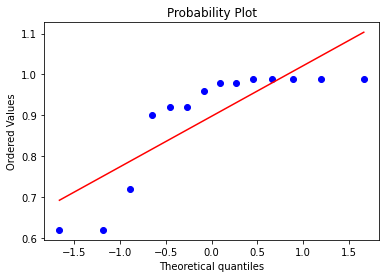

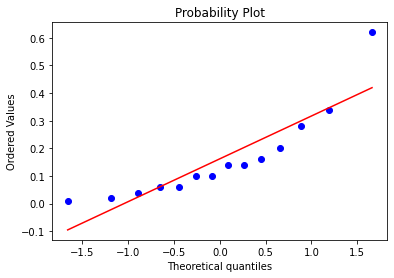

KstestResult(statistic=0.6502185485738271, pvalue=2.596644770449883e-06)
ShapiroResult(statistic=0.8063749074935913, pvalue=0.005990694742649794)


In [44]:
stats.probplot(congrfhits, dist = "norm", plot = pylab)
pylab.show()
stats.probplot(congrffalsealarms, dist = "norm", plot = pylab)
pylab.show()
print(stats.kstest(congrfhits, 'logistic'))
print(stats.shapiro(congrffalsealarms))

In [45]:
unibhits = np.zeros(14)
unibfalsealarms = np.zeros(14)
unibdprime = np.zeros(14)
unibbeta = np.zeros(14)
for i in np.arange(14):
    unibhits[i] = float(len(unib.loc[(unib['beeppres'] == 2) & (unib['acc'] == 1) & (unib['subj_idx'] == (i + 1))])) / len(unib.loc[(unib['beeppres'] == 2) & (unib['subj_idx'] == (i + 1))])
    unibfalsealarms[i] = float(len(unib.loc[(unib['beeppres'] == 3) & (unib['acc'] == 0) & (unib['subj_idx'] == (i + 1))])) / len(unib.loc[(unib['beeppres'] == 3) & (unib['subj_idx'] == (i + 1))])
    
    unibhits = np.where(unibhits == 1, (1 - 0.01), unibhits)
    unibfalsealarms = np.where(unibfalsealarms == 0, 0.01, unibfalsealarms)
    
    unibdprime[i] = stats.norm.ppf(unibhits[i]) - stats.norm.ppf(unibfalsealarms[i])
    unibbeta[i] = 0.5*(stats.norm.ppf(unibhits[i]) + stats.norm.ppf(unibfalsealarms[i]))

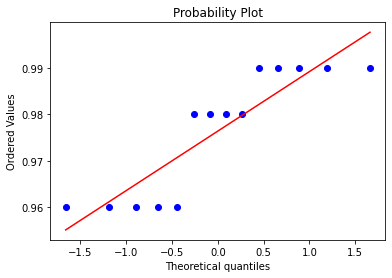

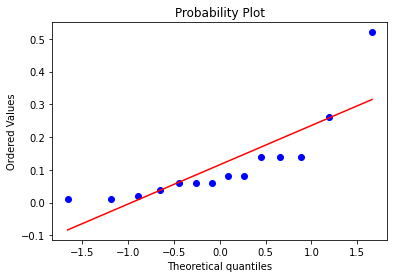

ShapiroResult(statistic=0.7676025629043579, pvalue=0.0020392057485878468)
ShapiroResult(statistic=0.7153573036193848, pvalue=0.0005353461601771414)


In [46]:
stats.probplot(unibhits, dist = "norm", plot = pylab)
pylab.show()
stats.probplot(unibfalsealarms, dist = "norm", plot = pylab)
pylab.show()
print(stats.shapiro(unibhits))
print(stats.shapiro(unibfalsealarms))

In [47]:
congrbhits = np.zeros(14)
congrbfalsealarms = np.zeros(14)
congrbdprime = np.zeros(14)
congrbbeta = np.zeros(14)
for i in np.arange(14):
    congrbhits[i] = float(len(congrb.loc[(congrb['beeppres'] == 2) & (congrb['acc'] == 1) & (congrb['subj_idx'] == (i + 1))])) / len(congrb.loc[(congrb['beeppres'] == 2) & (congrb['subj_idx'] == (i + 1))])
    congrbfalsealarms[i] = float(len(congrb.loc[(congrb['beeppres'] == 3) & (congrb['acc'] == 0) & (congrb['subj_idx'] == (i + 1))])) / len(congrb.loc[(congrb['beeppres'] == 3) & (congrb['subj_idx'] == (i + 1))])
    
    congrbhits = np.where(congrbhits == 1, (1 - 0.01), congrbhits)
    congrbfalsealarms = np.where(congrbfalsealarms == 0, 0.01, congrbfalsealarms)
    
    congrbdprime[i] = stats.norm.ppf(congrbhits[i]) - stats.norm.ppf(congrbfalsealarms[i])
    congrbbeta[i] = 0.5*(stats.norm.ppf(congrbhits[i]) + stats.norm.ppf(congrbfalsealarms[i]))

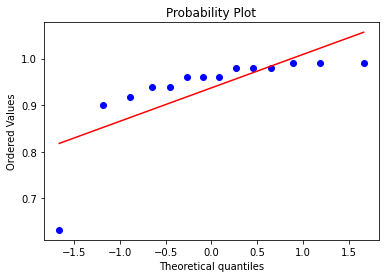

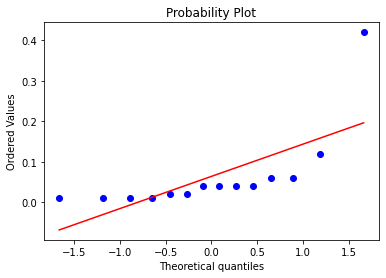

ShapiroResult(statistic=0.5628252625465393, pvalue=1.9272411009296775e-05)
ShapiroResult(statistic=0.519392728805542, pvalue=8.443856131634675e-06)


In [48]:
stats.probplot(congrbhits, dist = "norm", plot = pylab)
pylab.show()
stats.probplot(congrbfalsealarms, dist = "norm", plot = pylab)
pylab.show()
print(stats.shapiro(congrbhits))
print(stats.shapiro(congrbfalsealarms))

In [49]:
np.std(congrbbeta)

0.37098082841431546

In [50]:
np.mean(congrfbeta)

0.2248444399340696

In [51]:
index = unif.groupby(by='subj_idx').mean()['acc'].index
print(stats.ttest_rel(unifdprime, congrfdprime))
print(rp.ttest(pd.Series(unifdprime, index = index), pd.Series(congrfdprime, index = index), paired = True))


Ttest_relResult(statistic=-5.561359596064311, pvalue=9.206159135987234e-05)
(  Variable     N      Mean        SD        SE  95% Conf.  Interval
0      NaN  14.0  1.266423  0.506678  0.135415   0.973876  1.558971
1      NaN  14.0  2.803943  1.072782  0.286713   2.184537  3.423348
2     diff  14.0 -1.537519  1.034436  0.276465  -2.134785 -0.940254,          Paired samples t-test  results
0  Difference (None - None) =   -1.5375
1        Degrees of freedom =   13.0000
2                         t =   -5.5614
3     Two side test p value =    0.0001
4    Difference < 0 p value =    0.0000
5    Difference > 0 p value =    1.0000
6                 Cohen's d =   -1.9469
7                 Hedge's g =   -1.8902
8             Glass's delta =   -3.0345
9               Pearson's r =    0.8391)


In [52]:
print(stats.ttest_rel(unifbeta, congrfbeta))
print(rp.ttest(pd.Series(unifbeta, index = index), pd.Series(congrfbeta, index = index), paired = True))


Ttest_relResult(statistic=2.3086409876478546, pvalue=0.0380437080552661)
(  Variable     N      Mean        SD        SE  95% Conf.  Interval
0      NaN  14.0  0.633543  0.466939  0.124795   0.363941  0.903146
1      NaN  14.0  0.224844  0.486889  0.130127  -0.056277  0.505966
2     diff  14.0  0.408699  0.662386  0.177030   0.026249  0.791149,          Paired samples t-test  results
0  Difference (None - None) =    0.4087
1        Degrees of freedom =   13.0000
2                         t =    2.3086
3     Two side test p value =    0.0380
4    Difference < 0 p value =    0.9810
5    Difference > 0 p value =    0.0190
6                 Cohen's d =    0.8570
7                 Hedge's g =    0.8320
8             Glass's delta =    0.8753
9               Pearson's r =    0.5392)


In [53]:
print(stats.ttest_rel(unibdprime, congrbdprime))
print(rp.ttest(pd.Series(unibdprime, index = index), pd.Series(congrbdprime, index = index), paired = True))


Ttest_relResult(statistic=-0.5045478480276937, pvalue=0.6223198286297618)
(  Variable     N      Mean        SD        SE  95% Conf.  Interval
0      NaN  14.0  3.454708  0.637576  0.170399   3.086583  3.822833
1      NaN  14.0  3.529301  0.797445  0.213126   3.068870  3.989732
2     diff  14.0 -0.074593  0.553171  0.147841  -0.393985  0.244799,          Paired samples t-test  results
0  Difference (None - None) =   -0.0746
1        Degrees of freedom =   13.0000
2                         t =   -0.5045
3     Two side test p value =    0.6223
4    Difference < 0 p value =    0.3112
5    Difference > 0 p value =    0.6888
6                 Cohen's d =   -0.1040
7                 Hedge's g =   -0.1009
8             Glass's delta =   -0.1170
9               Pearson's r =    0.1386)


In [54]:
print(stats.ttest_rel(unibbeta, congrbbeta))
print(rp.ttest(pd.Series(unibbeta, index = index), pd.Series(congrbbeta, index = index), paired = True))


Ttest_relResult(statistic=2.7862920634193222, pvalue=0.015429203864906336)
(  Variable     N      Mean        SD        SE  95% Conf.  Interval
0      NaN  14.0  0.315515  0.367187  0.098135   0.103508  0.527522
1      NaN  14.0 -0.014068  0.384985  0.102892  -0.236352  0.208216
2     diff  14.0  0.329583  0.442591  0.118287   0.074039  0.585128,          Paired samples t-test  results
0  Difference (None - None) =    0.3296
1        Degrees of freedom =   13.0000
2                         t =    2.7863
3     Two side test p value =    0.0154
4    Difference < 0 p value =    0.9923
5    Difference > 0 p value =    0.0077
6                 Cohen's d =    0.8764
7                 Hedge's g =    0.8508
8             Glass's delta =    0.8976
9               Pearson's r =    0.6115)


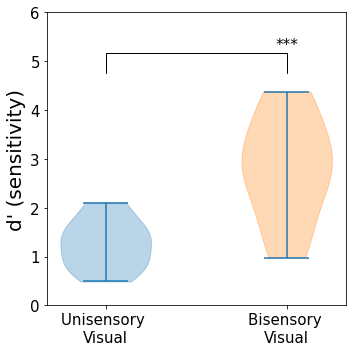

In [55]:
from matplotlib.offsetbox import AnchoredText
flashunidprime = unifdprime.max()
flashcongrdprime = congrfdprime.max()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('d\' (sensitivity)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashunidprime, flashcongrdprime]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.65), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.55), xytext=(X[j],y-0.55), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unifdprime, 
                        congrfdprime], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "***", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))
'''
at = AnchoredText("***  p < 0.001\n        N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.ylim([0, 6])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig("visualdprime.png", dpi=100)
plt.show()

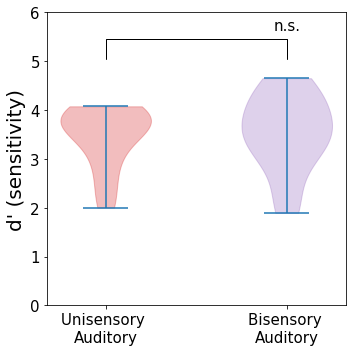

In [56]:
from matplotlib.offsetbox import AnchoredText
beepunidprime = unibdprime.max()
beepcongrdprime = congrbdprime.max()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('d\' (sensitivity)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory',  'Bisensory \nAuditory')
performance = [beepunidprime, beepcongrdprime]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.75), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.55), xytext=(X[j],y-0.55), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unibdprime, 
                        congrbdprime], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))
'''
at = AnchoredText("***  p < 0.001\n        N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.ylim([0, 6])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig("auddprime.png", dpi=100)
plt.show()

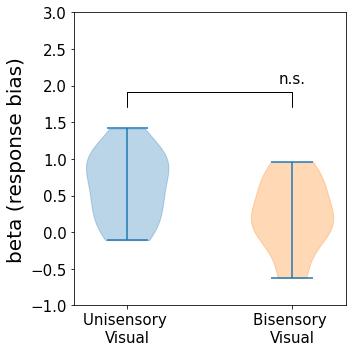

In [57]:
from matplotlib.offsetbox import AnchoredText
flashunibeta = unifbeta.max()
flashcongrbeta = congrfbeta.max()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('beta (response bias)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashunibeta, flashcongrbeta]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.55), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.25), xytext=(X[j],y-0.25), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unifbeta, 
                        congrfbeta], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))

#at = AnchoredText("***  p < 0.001\n        N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='upper right',
#              )
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.ylim([-1, 3])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig("visualbeta.png", dpi=100)
plt.show()

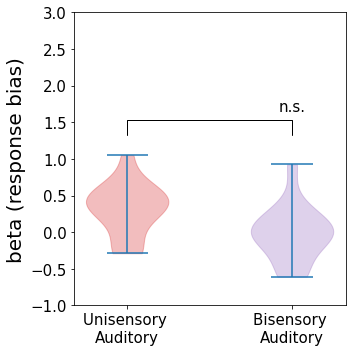

In [58]:
from matplotlib.offsetbox import AnchoredText
beepunibeta = unibbeta.max()
beepcongrbeta = congrbbeta.max()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('beta (response bias)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory',  'Bisensory \nAuditory')
performance = [beepunibeta, beepcongrbeta]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.55), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.25), xytext=(X[j],y-0.25), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unibbeta, 
                        congrbbeta], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))

#at = AnchoredText("***  p < 0.001\n        N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='upper right',
#              )
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.ylim([-1, 3])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig("auddprime.png", dpi=100)
plt.show()

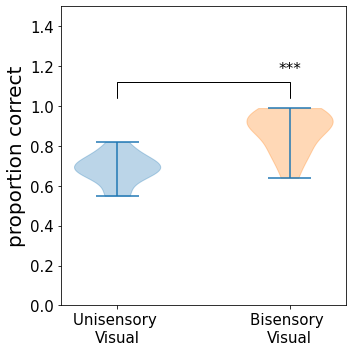

In [59]:
from matplotlib.offsetbox import AnchoredText
flashuniacc = unif['acc'].mean()
flashcongracc = congrf['acc'].mean()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('proportion correct', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashuniacc, flashcongracc]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.05), xytext=(X[j],y-0.05), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

vplot = plt.violinplot([unif.groupby(by = ['subj_idx']).mean()['acc'], 
                        congrf.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "***", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))
'''
at = AnchoredText("***  p < 0.001\n        N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.ylim([0, 1.5])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig('visaccuracy.png', dpi=100)

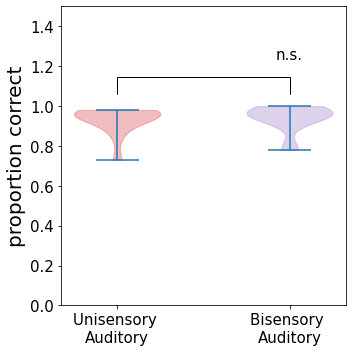

In [60]:
beepuniacc = unib['acc'].mean()
beepcongracc = congrb['acc'].mean()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('proportion correct', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory', 'Bisensory \nAuditory')
performance = [beepuniacc, beepcongracc]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y - 0.1), xytext=(X[j],y-0.1), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unib.groupby(by = ['subj_idx']).mean()['acc'], 
                        congrb.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))
'''
at = AnchoredText("***  p < 0.001\n        N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.ylim([0, 1.5])
plt.xticks(y_pos, objects)

plt.tight_layout()
plt.savefig('audaccuracy.png', dpi=100)

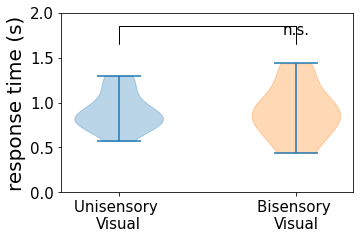

In [61]:
flashunirt = unif.loc[unif['acc'] == 1]['rt'].mean()
beepunirt = unib.loc[unib['acc'] == 1]['rt'].mean()
flashcongrrt = congrf.loc[congrf['acc'] == 1]['rt'].mean()
beepcongrrt = congrb.loc[congrb['acc'] == 1]['rt'].mean()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('response time (s)', fontsize = 20)
objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
y_pos = [0,1] 
performance = [flashunirt, flashcongrrt, beepunirt, beepcongrrt]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.25), xytext=(X[j],y-0.25), arrowprops=props)

colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unif.groupby(by = ['subj_idx']).mean()['rt'], 
                        congrf.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)

label_diff(0, 1, "n.s.", range(5), [max(unif.groupby(by = ['subj_idx']).mean()['rt']), 
                                    max(congrf.groupby(by = ['subj_idx']).mean()['rt'])])

#at = AnchoredText("N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='lower right',)
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.25)


plt.xticks(y_pos, objects)
plt.ylim([0,2])
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

plt.savefig('vismean_rt.png', dpi=100)

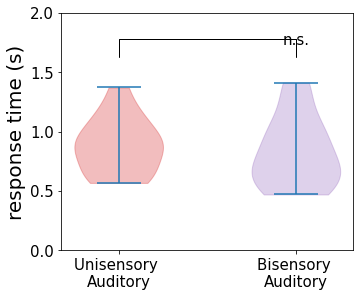

In [62]:
beepunirt = unib.loc[unib['acc'] == 1]['rt'].mean()
beepcongrrt = congrb.loc[congrb['acc'] == 1]['rt'].mean()

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('response time (s)', fontsize = 20)
objects = ('Unisensory \nAuditory', 'Bisensory \nAuditory')
y_pos = [0,1] 
performance = [beepunirt, beepcongrrt]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':35,'shrinkB':35,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.15), xytext=(X[j],y-0.15), arrowprops=props)

colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unib.groupby(by = ['subj_idx']).mean()['rt'], 
                        congrb.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)

label_diff(0, 1, "n.s.", range(5), [max(unib.groupby(by = ['subj_idx']).mean()['rt']), 
                                    max(congrb.groupby(by = ['subj_idx']).mean()['rt'])])
'''
at = AnchoredText("N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',)
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.tight_layout()

plt.xticks(y_pos, objects)
plt.ylim([0,2])
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

plt.savefig('audmean_rt.png', dpi=100)

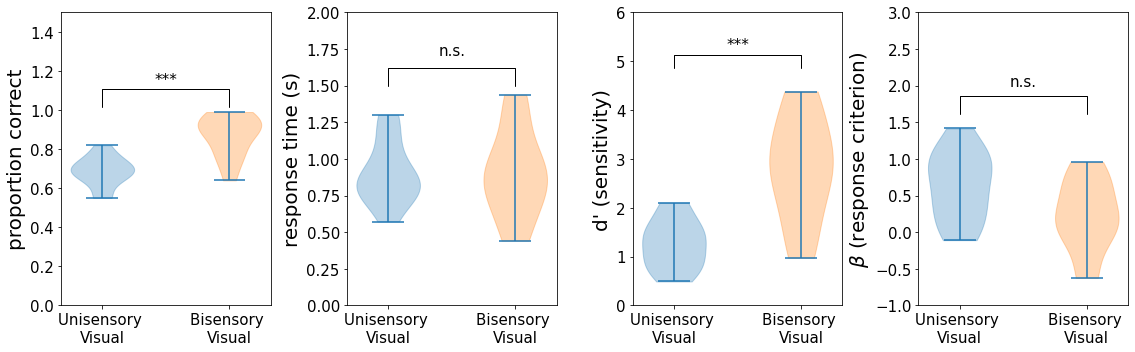

In [66]:
from matplotlib.offsetbox import AnchoredText
flashuniacc = unif['acc'].mean()
flashcongracc = congrf['acc'].mean()

fig = plt.figure(figsize=(16,5)) 
ax = fig.add_subplot(141)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('proportion correct', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashuniacc, flashcongracc]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.22), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

vplot = plt.violinplot([unif.groupby(by = ['subj_idx']).mean()['acc'], 
                        congrf.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "***", range(5), performance)

plt.ylim([0, 1.5])
plt.xticks(y_pos, objects)


flashunirt = unif.loc[unif['acc'] == 1]['rt'].mean()
beepunirt = unib.loc[unib['acc'] == 1]['rt'].mean()
flashcongrrt = congrf.loc[congrf['acc'] == 1]['rt'].mean()
beepcongrrt = congrb.loc[congrb['acc'] == 1]['rt'].mean()

ax = fig.add_subplot(142)

#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('response time (s)', fontsize = 20)
objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
y_pos = [0,1] 
performance = [flashunirt, flashcongrrt, beepunirt, beepcongrrt]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.2), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.15), xytext=(X[j],y-0.15), arrowprops=props)

colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unif.groupby(by = ['subj_idx']).mean()['rt'], 
                        congrf.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)

label_diff(0, 1, "n.s.", range(5), [max(unif.groupby(by = ['subj_idx']).mean()['rt']), 
                                    max(congrf.groupby(by = ['subj_idx']).mean()['rt'])])

#at = AnchoredText("N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='lower right',)
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.25)


plt.xticks(y_pos, objects)
plt.ylim([0,2])
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

from matplotlib.offsetbox import AnchoredText
flashunidprime = unifdprime.max()
flashcongrdprime = congrfdprime.max()

ax = fig.add_subplot(143)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('d\' (sensitivity)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashunidprime, flashcongrdprime]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.65), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.25), xytext=(X[j],y-0.25), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unifdprime, 
                        congrfdprime], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "***", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))
'''
at = AnchoredText("***  p < 0.001\n        N = 14",
              prop=dict(size=14), frameon=True,
              loc='lower right',
              )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)
'''
plt.ylim([0, 6])
plt.xticks(y_pos, objects)

from matplotlib.offsetbox import AnchoredText
flashunibeta = unifbeta.max()
flashcongrbeta = congrfbeta.max()

ax = fig.add_subplot(144)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel(r'$\beta$ (response criterion)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nVisual',  'Bisensory \nVisual')
performance = [flashunibeta, flashcongrbeta]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.5), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.15), xytext=(X[j],y-0.15), arrowprops=props)
    
y_pos = [0,1]
colors = ['#1f77b4', '#ff7f0e']

vplot = plt.violinplot([unifbeta, 
                        congrfbeta], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))

#at = AnchoredText("***  p < 0.001\n        N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='upper right',
#              )
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.ylim([-1, 3])
plt.xticks(y_pos, objects)


plt.tight_layout(w_pad = 2)
plt.savefig('vis.png', bbox_inches = 'tight', dpi = 250)

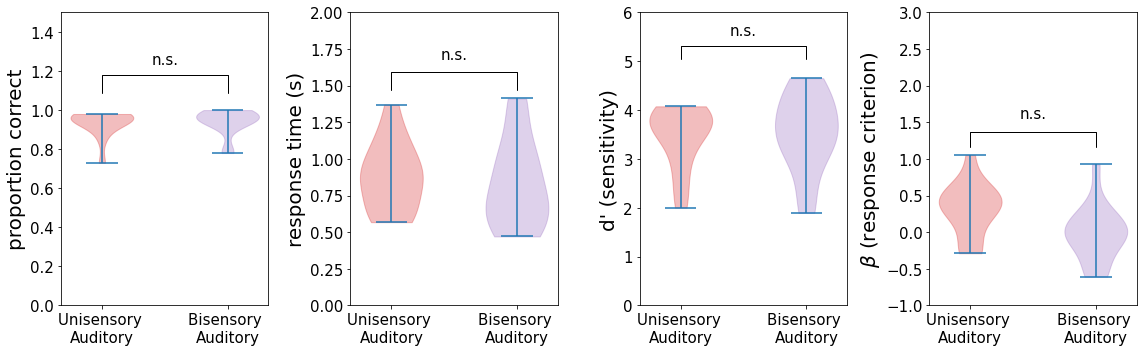

In [67]:
beepuniacc = unib['acc'].mean()
beepcongracc = congrb['acc'].mean()

fig = plt.figure(figsize=(16,5)) 
ax = fig.add_subplot(141)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('proportion correct', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory', 'Bisensory \nAuditory')
performance = [beepuniacc, beepcongracc]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.25), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unib.groupby(by = ['subj_idx']).mean()['acc'], 
                        congrb.groupby(by = ['subj_idx']).mean()['acc']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)

plt.ylim([0, 1.5])
plt.xticks(y_pos, objects)

beepunirt = unib.loc[unib['acc'] == 1]['rt'].mean()
beepcongrrt = congrb.loc[congrb['acc'] == 1]['rt'].mean()

ax = fig.add_subplot(142)

#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('response time (s)', fontsize = 20)
objects = ('Unisensory \nAuditory', 'Bisensory \nAuditory')
y_pos = [0,1] 
performance = [beepunirt, beepcongrrt]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.2), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.15), xytext=(X[j],y-0.15), arrowprops=props)

colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unib.groupby(by = ['subj_idx']).mean()['rt'], 
                        congrb.groupby(by = ['subj_idx']).mean()['rt']], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)

label_diff(0, 1, "n.s.", range(5), [max(unib.groupby(by = ['subj_idx']).mean()['rt']), 
                                    max(congrb.groupby(by = ['subj_idx']).mean()['rt'])])

plt.xticks(y_pos, objects)
plt.ylim([0,2])
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

beepunidprime = unibdprime.max()
beepcongrdprime = congrbdprime.max()

ax = fig.add_subplot(143)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel('d\' (sensitivity)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory',  'Bisensory \nAuditory')
performance = [beepunidprime, beepcongrdprime]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.65), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.35), xytext=(X[j],y-0.35), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unibdprime, 
                        congrbdprime], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)

plt.ylim([0, 6])
plt.xticks(y_pos, objects)

from matplotlib.offsetbox import AnchoredText
beepunibeta = unibbeta.max()
beepcongrbeta = congrbbeta.max()

ax = fig.add_subplot(144)
#ax.set_xlabel('condition', fontsize = 20)
ax.set_ylabel(r'$\beta$ (response criterion)', fontsize = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)

objects = ('Unisensory \nAuditory',  'Bisensory \nAuditory')
performance = [beepunibeta, beepcongrbeta]

def label_diff(i,j,text,X,Y):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':23,'shrinkB':23,'linewidth':1}
    x = (X[i]+X[j])/2
    y = 1.05*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    ax.annotate(text, xy=(x,y+0.45), zorder=10, ha= 'center', size = 15)
    ax.annotate('', xy=(X[i],y-0.25), xytext=(X[j],y-0.25), arrowprops=props)
    
y_pos = [0,1]
colors = ['#d62728', '#9467bd']

vplot = plt.violinplot([unibbeta, 
                        congrbbeta], positions = [0,1])
for patch, color in zip(vplot['bodies'], colors):         
    patch.set_color(color)
    patch.set_edgecolor(color)
label_diff(0, 1, "n.s.", range(5), performance)
#label_diff(3, 4, "n.s.", range(5), np.insert(performance, 0, 2))

#at = AnchoredText("***  p < 0.001\n        N = 14",
#              prop=dict(size=14), frameon=True,
#              loc='upper right',
#              )
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

plt.ylim([-1, 3])
plt.xticks(y_pos, objects)


plt.tight_layout()
plt.savefig('aud.png', bbox_inches = 'tight', dpi = 250)

## Accuracy-coded models (same threshold)

### Accuracy-coded Flash Model

In [58]:
flash_acc = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type'], 't': ['type']})
flash_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 353.1 sec

In [59]:
flash_acc.print_stats()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               1.613598  0.073353  1.476150  1.565314  1.611246  1.657682  1.769046  0.001241
a_std           0.255848  0.063949  0.161882  0.211555  0.245364  0.288470  0.409342  0.001347
a_subj.1.0      1.941815  0.083181  1.780732  1.885275  1.940059  1.996873  2.107574  0.001585
a_subj.2.0      1.881415  0.077797  1.735300  1.828424  1.879052  1.931997  2.040177  0.001596
a_subj.3.0      1.352651  0.064471  1.232822  1.307929  1.349826  1.394586  1.486505  0.001384
a_subj.4.0      1.524481  0.069975  1.388052  1.475001  1.524947  1.572465  1.661606  0.001853
a_subj.5.0      1.750281  0.082587  1.594947  1.692913  1.749044  1.805491  1.916707  0.001882
a_subj.6.0      1.747163  0.071082  1.615332  1.697196  1.745083  1.794942  1.890711  0.001336
a_subj.7.0      1.792251  0.082692  1.642630  1.734105  1.787691  1.846875  1.962529  0.001838
a_subj.8.0      1.601267  0.076741  1.454389  1.54

In [30]:
flash_a_indiv = np.mean(flash_acc.get_traces().loc[:, ['a_subj.1.0', 'a_subj.10.0','a_subj.11.0','a_subj.12.0',
                               'a_subj.13.0','a_subj.14.0','a_subj.2.0','a_subj.3.0','a_subj.4.0',
                               'a_subj.5.0','a_subj.6.0','a_subj.7.0','a_subj.8.0','a_subj.9.0']], axis = 0).values
flash_v_u_indiv = np.mean(flash_acc.get_traces().loc[:, ['v_subj(u).1.0','v_subj(u).10.0','v_subj(u).11.0','v_subj(u).12.0',
                                                         'v_subj(u).13.0','v_subj(u).14.0','v_subj(u).2.0','v_subj(u).3.0','v_subj(u).4.0',
                                                         'v_subj(u).5.0','v_subj(u).6.0','v_subj(u).7.0','v_subj(u).8.0','v_subj(u).9.0']], axis = 0).values
flash_v_c_indiv = np.mean(flash_acc.get_traces().loc[:, ['v_subj(c).1.0','v_subj(c).10.0','v_subj(c).11.0','v_subj(c).12.0','v_subj(c).13.0',
                                                         'v_subj(c).14.0','v_subj(c).2.0','v_subj(c).3.0','v_subj(c).4.0','v_subj(c).5.0',
                                                         'v_subj(c).6.0','v_subj(c).7.0','v_subj(c).8.0','v_subj(c).9.0']], axis = 0).values
flash_t_u_indiv = np.mean(flash_acc.get_traces().loc[:, ['t_subj(u).1.0','t_subj(u).10.0','t_subj(u).11.0','t_subj(u).12.0','t_subj(u).13.0',
                                                         't_subj(u).14.0','t_subj(u).2.0','t_subj(u).3.0','t_subj(u).4.0','t_subj(u).5.0',
                                                         't_subj(u).6.0','t_subj(u).7.0','t_subj(u).8.0','t_subj(u).9.0']], axis = 0).values
flash_t_c_indiv = np.mean(flash_acc.get_traces().loc[:, ['t_subj(c).1.0','t_subj(c).10.0','t_subj(c).11.0','t_subj(c).12.0','t_subj(c).13.0',
                                                         't_subj(c).14.0','t_subj(c).2.0','t_subj(c).3.0','t_subj(c).4.0','t_subj(c).5.0',
                                                         't_subj(c).6.0','t_subj(c).7.0','t_subj(c).8.0','t_subj(c).9.0']], axis = 0).values

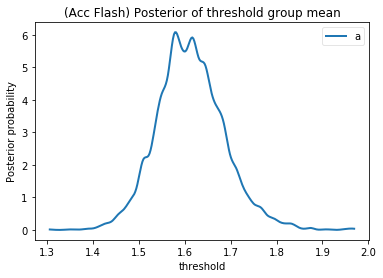

In [31]:
a = flash_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of threshold group mean')
plt.show()

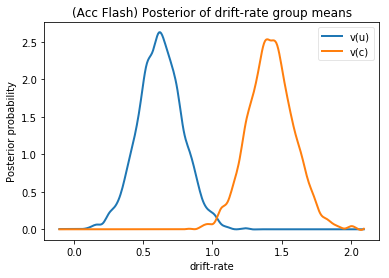

In [32]:
v_u, v_c = flash_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of drift-rate group means')
plt.show()

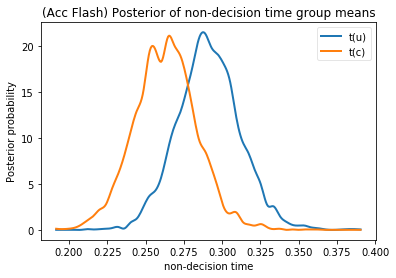

In [33]:
t_u, t_c = flash_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of non-decision time group means')
plt.show()

In [40]:
from kabuki.analyze import gelman_rubin

models = []
for i in range(5):
    m = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type'], 't': ['type']})
    m.sample(7000, burn=500)
    models.append(m)

gelman_rubin(models)

 [                  1%                  ] 81 of 7000 complete in 4.7 secHalting at iteration  79  of  7000
Could not generate output statistics for t_subj(c).5.0
Could not generate output statistics for t_subj(u).7.0
Could not generate output statistics for t_subj(u).11.0
Could not generate output statistics for v_subj(c).2.0
Could not generate output statistics for t_std
Could not generate output statistics for v_subj(u).12.0
Could not generate output statistics for t_subj(c).9.0
Could not generate output statistics for a_subj.2.0
Could not generate output statistics for v_subj(u).3.0
Could not generate output statistics for t_subj(u).5.0
Could not generate output statistics for p_outlier
Could not generate output statistics for t(u)
Could not generate output statistics for t_subj(c).12.0
Could not generate output statistics for a_subj.11.0
Could not generate output statistics for v_subj(c).5.0
Could not generate output statistics for t_subj(c).10.0
Could not generate output statistic

TypeError: 'NoneType' object has no attribute '__getitem__'

### Posterior Predictive Check (Accuracy-coded Flash)

In [ ]:
fppc = hddm.utils.post_pred_gen(flash_acc)

In [ ]:
fppc_compare = hddm.utils.post_pred_stats(model_f, fppc)
print(fppc_compare)

### Parameter Recovery (Accuracy-coded Flash)

In [ ]:
fsyndata, fparam = hddm.generate.gen_rand_data(params={'u': {'a': 1.614262, 'v': 0.653901, 't': 0.309421},
                                                       'c': {'a': 1.614262, 'v': 1.413023, 't': 0.266443}}, 
                                               size = 100, subjs = 14)

In [ ]:
fparamrec = hddm.HDDM(fsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
fparamrec.sample(7000, burn=500)

In [ ]:
#fparamrec.print_stats()

a: 1.8% diff

v(c): 4.2% diff

v(u): 0.5% diff

t(c): 8% diff

t(u): 7.8% diff

### Accuracy-coded Beep Model

In [60]:
beep_acc = hddm.HDDM(model_b, include=['p_outlier'], depends_on={'v': ['type'], 't': ['type']})
beep_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 367.0 sec

In [61]:
beep_acc.print_stats()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               2.324223  0.131480  2.089381  2.235163  2.314718  2.404984  2.612850  0.005590
a_std           0.374285  0.114695  0.193448  0.293593  0.357933  0.437610  0.646109  0.005124
a_subj.1.0      2.801023  0.217616  2.413809  2.642753  2.791388  2.942601  3.246249  0.009131
a_subj.2.0      2.042866  0.110239  1.839730  1.965710  2.039034  2.113062  2.274597  0.002606
a_subj.3.0      2.141458  0.249446  1.716216  1.961361  2.118052  2.308817  2.668897  0.014644
a_subj.4.0      1.927078  0.082107  1.765766  1.871399  1.927336  1.982869  2.088309  0.001646
a_subj.5.0      2.330095  0.093996  2.150475  2.264965  2.329007  2.393435  2.517267  0.001756
a_subj.6.0      2.752811  0.268416  2.297613  2.560500  2.730214  2.917411  3.340067  0.014371
a_subj.7.0      2.449525  0.175362  2.129354  2.329097  2.441133  2.562782  2.813924  0.007133
a_subj.8.0      2.561410  0.237760  2.137531  2.39

In [36]:
beep_a_indiv = np.mean(beep_acc.get_traces().loc[:, ['a_subj.1.0', 'a_subj.10.0','a_subj.11.0','a_subj.12.0',
                               'a_subj.13.0','a_subj.14.0','a_subj.2.0','a_subj.3.0','a_subj.4.0',
                               'a_subj.5.0','a_subj.6.0','a_subj.7.0','a_subj.8.0','a_subj.9.0']], axis = 0).values
beep_v_u_indiv = np.mean(beep_acc.get_traces().loc[:, ['v_subj(u).1.0','v_subj(u).10.0','v_subj(u).11.0','v_subj(u).12.0',
                                                         'v_subj(u).13.0','v_subj(u).14.0','v_subj(u).2.0','v_subj(u).3.0','v_subj(u).4.0',
                                                         'v_subj(u).5.0','v_subj(u).6.0','v_subj(u).7.0','v_subj(u).8.0','v_subj(u).9.0']], axis = 0).values
beep_v_c_indiv = np.mean(beep_acc.get_traces().loc[:, ['v_subj(c).1.0','v_subj(c).10.0','v_subj(c).11.0','v_subj(c).12.0','v_subj(c).13.0',
                                                         'v_subj(c).14.0','v_subj(c).2.0','v_subj(c).3.0','v_subj(c).4.0','v_subj(c).5.0',
                                                         'v_subj(c).6.0','v_subj(c).7.0','v_subj(c).8.0','v_subj(c).9.0']], axis = 0).values
beep_t_u_indiv = np.mean(beep_acc.get_traces().loc[:, ['t_subj(u).1.0','t_subj(u).10.0','t_subj(u).11.0','t_subj(u).12.0','t_subj(u).13.0',
                                                         't_subj(u).14.0','t_subj(u).2.0','t_subj(u).3.0','t_subj(u).4.0','t_subj(u).5.0',
                                                         't_subj(u).6.0','t_subj(u).7.0','t_subj(u).8.0','t_subj(u).9.0']], axis = 0).values
beep_t_c_indiv = np.mean(beep_acc.get_traces().loc[:, ['t_subj(c).1.0','t_subj(c).10.0','t_subj(c).11.0','t_subj(c).12.0','t_subj(c).13.0',
                                                         't_subj(c).14.0','t_subj(c).2.0','t_subj(c).3.0','t_subj(c).4.0','t_subj(c).5.0',
                                                         't_subj(c).6.0','t_subj(c).7.0','t_subj(c).8.0','t_subj(c).9.0']], axis = 0).values

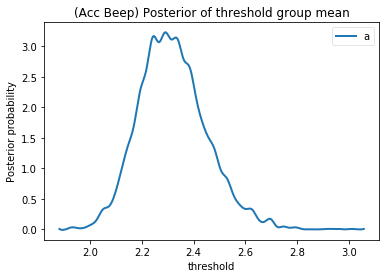

In [37]:
a = beep_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of threshold group mean')
plt.show()

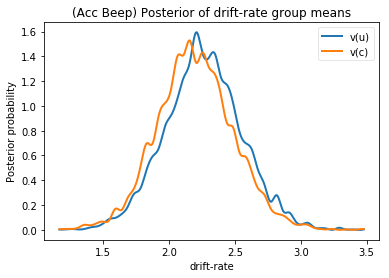

In [38]:
v_u, v_c = beep_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of drift-rate group means')
plt.show()

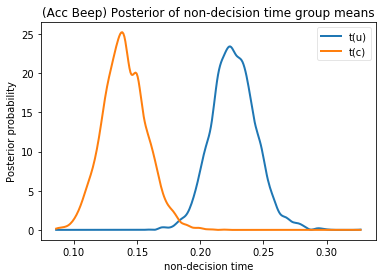

In [39]:
t_u, t_c = beep_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of non-decision time group means')
plt.show()

In [25]:
models2 = []
for i in range(5):
    m2 = hddm.HDDM(model_b, include=['p_outlier'], depends_on={'v': ['type'], 't': ['type']})
    m2.sample(7000, burn=500)
    models2.append(m2)

gelman_rubin(models2)

 [-----------------100%-----------------] 7000 of 7000 complete in 445.8 sec

{'a': 1.0019288069721606,
 'a_std': 1.002114362907285,
 'a_subj.1.0': 1.0013641732684346,
 'a_subj.10.0': 1.000044482731245,
 'a_subj.11.0': 1.001899434028479,
 'a_subj.12.0': 1.0012043858205466,
 'a_subj.13.0': 1.0069102831739931,
 'a_subj.14.0': 1.0028951764390823,
 'a_subj.2.0': 1.0000561269043378,
 'a_subj.3.0': 1.0004919515635622,
 'a_subj.4.0': 1.0001490453797588,
 'a_subj.5.0': 1.000220648514722,
 'a_subj.6.0': 1.0007496087388517,
 'a_subj.7.0': 1.0005575766000463,
 'a_subj.8.0': 1.0030683444238162,
 'a_subj.9.0': 1.0005712262695634,
 'p_outlier': 1.0001903504361231,
 't(c)': 1.0008228385868412,
 't(u)': 1.0004670898205732,
 't_std': 1.0001782669177168,
 't_subj(c).1.0': 1.0010238862507395,
 't_subj(c).10.0': 1.0000904830686592,
 't_subj(c).11.0': 1.0015760276742744,
 't_subj(c).12.0': 1.0007969017525469,
 't_subj(c).13.0': 1.0050006090251555,
 't_subj(c).14.0': 1.001793233468012,
 't_subj(c).2.0': 1.000021749525088,
 't_subj(c).3.0': 1.0002793356599098,
 't_subj(c).4.0': 1.0003

### Posterior Predictive Check (Accuracy-coded beep)

In [34]:
bppc = hddm.utils.post_pred_gen(beep_acc)

 [-------------------110%-------------------] 31 of 28 complete in 1776.8 sec

In [35]:
bppc_compare = hddm.utils.post_pred_stats(model_b, bppc)
print(bppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.963332  0.069635  0.000747  0.005596     True   
mean_ub   0.811824  0.743741  0.238562  0.004635  0.061547     True   
std_ub    0.705276  0.358153  0.200002  0.120494  0.160495     True   
10q_ub    0.364230  0.400337  0.089871  0.001304  0.009380     True   
30q_ub    0.491178  0.519530  0.127677  0.000804  0.017105     True   
50q_ub    0.613278  0.649873  0.185217  0.001339  0.035645     True   
70q_ub    0.787827  0.832018  0.279520  0.001953  0.080084     True   
90q_ub    1.393924  1.204898  0.491904  0.035731  0.277700     True   
mean_lb  -1.516434 -0.871308  0.355648  0.416188  0.542673     True   
std_lb    1.449590  0.319833  0.331790  1.276350  1.386434    False   
10q_lb    0.498767  0.581654  0.257240  0.006870  0.073042     True   
30q_lb    0.745144  0.678521  0.266507  0.004439  0.075465     True   
50q_lb

### Parameter Recovery (Accuracy-coded beep)

In [55]:
bsyndata, bparam = hddm.generate.gen_rand_data(params={'u': {'a': 2.315673, 'v': 2.250963, 't': 0.225897},
                                                       'c': {'a': 2.315673, 'v': 2.185236, 't': 0.141996}}, 
                                               size = 100, subjs = 14)

In [56]:
bparamrec = hddm.HDDM(bsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
bparamrec.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 511.9 sec

In [77]:
bparamrec.print_stats()

                    mean          std         2.5q          25q          50q         75q       97.5q       mc err
a                2.34405    0.0670458      2.22277      2.29615      2.34228     2.38813     2.47835   0.00395344
a_std           0.120995    0.0662182    0.0156859    0.0745465     0.115931    0.160459    0.267463   0.00385819
a_subj.0         2.41758     0.114074      2.22331      2.33788      2.40778     2.48787     2.67202   0.00530249
a_subj.1         2.33061     0.102668      2.13139      2.26104      2.32886     2.39779      2.5411   0.00432853
a_subj.2         2.35004     0.107713      2.14793      2.27835      2.34431     2.41414     2.58356   0.00482489
a_subj.3         2.41315     0.122356      2.21953      2.32805      2.39732      2.4825     2.69362   0.00557982
a_subj.4         2.33808    0.0917096      2.16277      2.27626      2.33575     2.39812     2.52629   0.00403297
a_subj.5         2.30356      0.10373       2.0991      2.23558      2.30242     2.36924

a: 1.2% diff

v(c): 0.2% diff

v(u): 2.7% diff

t(c): 8.4% diff

t(u): 3% diff

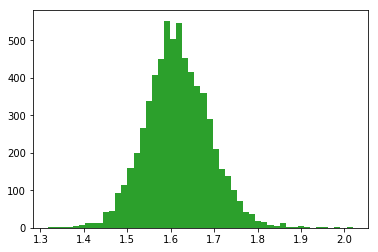

In [161]:
a1 = flash_acc.nodes_db.node['a']
plt.hist(a1.trace(), bins = 50, color = colors[2])
plt.show()

In [63]:
#from hddm.utils import interpolate_trace

def interpolate_trace(x, trace, range=(-1,1), bins=100):
    """Interpolate distribution (from samples) at position x.

    :Arguments:
        x <float>: position at which to evalute posterior.
        trace <np.ndarray>: Trace containing samples from posterior.

    :Optional:
        range <tuple=(-1,1): Bounds of histogram (should be fairly
            close around region of interest).
        bins <int=100>: Bins of histogram (should depend on trace length).

    :Returns:
        float: Posterior density at x.
    """

    import scipy.interpolate

    x_histo = np.linspace(range[0], range[1], bins)
    histo = np.histogram(trace, bins=bins, range=range, density=True)[0]
    interp = scipy.interpolate.InterpolatedUnivariateSpline(x_histo, histo)(x)

    return interp

def plot_posterior_nodes(nodes, bins=50, lb=None, ub=None, styles=None):
    """Plot interpolated posterior of a list of nodes.

    :Arguments:
        nodes : list of pymc.Node's
            List of pymc.Node's to plot the posterior of.
            These can be found in model.nodes_db.node.ix['param_name']
        bins : int (default=50)
            How many bins to use for computing the histogram.
        lb : float (default is to infer from data)
            Lower boundary to use for plotting.
        ub : float (default is to infer from data)
            Upper boundary to use for plotting.
    """
    fig = plt.figure()
    if lb is None:
        lb = min([min(node.trace()[:]) for node in nodes])
    if ub is None:
        ub = max([max(node.trace()[:]) for node in nodes])

    x_data = np.linspace(lb, ub, 300)
    
    if styles:
        for node, style in zip(nodes, styles):
            trace = node.trace()[:]
            #hist = interpolate_trace(x_data, trace, range=(trace.min(), trace.max()), bins=bins)
            hist = interpolate_trace(x_data, trace, range=(lb, ub), bins=bins)
            plt.plot(x_data, hist, label=node.__name__, lw=2., linestyle = style)
    else:
        for node in nodes:
            trace = node.trace()[:]
            #hist = interpolate_trace(x_data, trace, range=(trace.min(), trace.max()), bins=bins)
            hist = interpolate_trace(x_data, trace, range=(lb, ub), bins=bins)
            plt.plot(x_data, hist, label=node.__name__, lw=2.)

    leg = plt.legend(loc='best', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    return fig

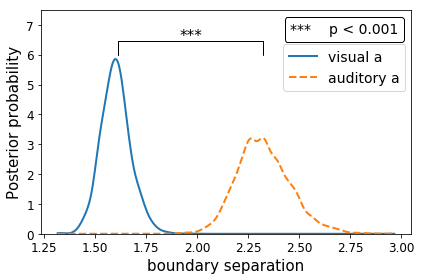

In [72]:
reload(hddm)
reload(kabuki)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

a1 = flash_acc.nodes_db.node['a']
a2 = beep_acc.nodes_db.node['a']
fig = plot_posterior_nodes([a1, a2], styles = ['solid', 'dashed'])
ax = fig.axes[0]
ax.set_xlabel('boundary separation', fontsize = 15)
ax.set_ylabel('Posterior probability', fontsize = 15)
#plt.axvline(a1.trace().mean(), color=colors[0], linestyle='dashed', linewidth=1)
#plt.text(a1.trace().mean()*1.02, 5.5, 'M: {:.2f}'.format(a1.trace().mean()))
#plt.axvline(a2.trace().mean(), color=colors[1], linestyle='dashed', linewidth=1)
#plt.text(a2.trace().mean()*1.02, 3.5, 'M: {:.2f}'.format(a2.trace().mean()))
X = [a1.trace().mean(), a2.trace().mean()]
Y = [6, 2]
text = '***'
i = 0
j = 1
props = {'connectionstyle':'bar','arrowstyle':'-',\
             'shrinkA':30,'shrinkB':30,'linewidth':1}
x = (X[i]+X[j])/2
y = max(Y[i], Y[j])
dx = abs(X[i]-X[j])
ax.annotate(text, xy=(x,y + 0.5), zorder=10, ha= 'center', size = 15, label="p < 0.001")
ax.annotate('', xy=(X[i],y - 1), xytext=(X[j],y - 1), arrowprops=props)

at = AnchoredText("***    p < 0.001",
                      prop=dict(size=14), frameon=True,
                      loc='upper right',
                      )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

#plt.title('Posteriors of threshold group means')
#plt.plot([], [], ' ', label="Extra label on the legend")
#label_diff(0, 1, '***', [a1.trace().mean(), a2.trace().mean()], [6, 2])

#ax.legend([h1, h2, h3.arrow_patch], (h1.get_label(),h2.get_label(), 'c'))
L = plt.legend(fontsize = 14, loc = (0.655,0.64))
L.get_texts()[0].set_text('visual a')
L.get_texts()[1].set_text('auditory a')


ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

ax.set_ylim([0, 7.5])

plt.tight_layout()
plt.savefig('a_post.png', dpi = 250)
plt.show()

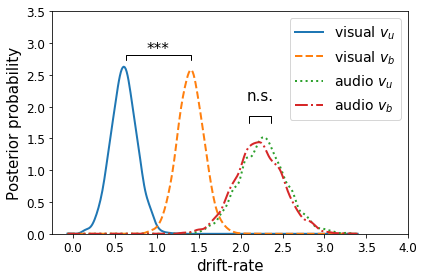

In [71]:
v_u, v_c = flash_acc.nodes_db.node[['v(u)', 'v(c)']]
v_u2, v_c2 = beep_acc.nodes_db.node[['v(u)', 'v(c)']]
plot_posterior_nodes([v_u, v_c, v_u2, v_c2], styles = ['solid', 'dashed', 'dotted', 'dashdot'])
plt.xlabel('drift-rate', fontsize = 15)
plt.ylabel('Posterior probability', fontsize = 15)

def label_diff(i,j,text,X,Y, s):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':s,'shrinkB':s,'linewidth':1}
    x = (X[i]+X[j])/2
    y = max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    plt.annotate(text, xy=(x,y + 0.35), zorder=10, ha= 'center', size = 15)
    plt.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

#plt.axvline(v_u.trace().mean(), color=colors[0], linestyle='dashed', linewidth=1)
#plt.text(v_u.trace().mean()*1.05, 2.5, 'M: {:.2f}'.format(v_u.trace().mean()))

#plt.axvline(v_c.trace().mean(), color=colors[1], linestyle='dashed', linewidth=1)
#plt.text(v_c.trace().mean()*1.05, 2.5, 'M: {:.2f}'.format(v_c.trace().mean()))

#plt.axvline(v_u2.trace().mean(), color=colors[2], linestyle='dashed', linewidth=1)
#plt.text(v_u2.trace().mean()*.78, 1.5, 'M: {:.2f}'.format(v_u2.trace().mean()))

#plt.axvline(v_c2.trace().mean(), color=colors[3], linestyle='dashed', linewidth=1)
#plt.text(v_c2.trace().mean()*1.05, 1.5, 'M: {:.2f}'.format(v_c2.trace().mean()))
#plt.title('Posteriors of drift-rate group means')

plt.ylim([0, 3.5])
plt.xlim([-0.25, 4])
L = plt.legend(fontsize = 14)
L.get_texts()[0].set_text(r'visual $v_u$')
L.get_texts()[1].set_text(r'visual $v_b$')
L.get_texts()[2].set_text(r'audio $v_u$')
L.get_texts()[3].set_text(r'audio $v_b$')

label_diff(0, 1, '***', [v_u.trace().mean(), v_c.trace().mean()], [2.5, 2], 15)
label_diff(0, 1, 'n.s.', [v_u2.trace().mean() - 0.15, v_c2.trace().mean() + 0.15], [1.75, 0], 40)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tight_layout()
plt.savefig('v_post.png', dpi = 250)
plt.show()

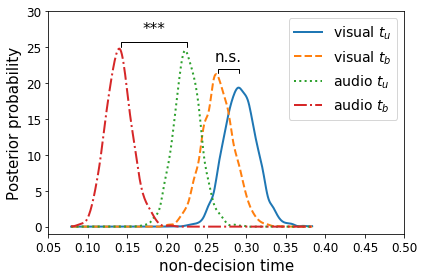

In [70]:
t_u, t_c = flash_acc.nodes_db.node[['t(u)', 't(c)']]
t_u2, t_c2 = beep_acc.nodes_db.node[['t(u)', 't(c)']]
plot_posterior_nodes([t_u, t_c, t_u2, t_c2], styles = ['solid', 'dashed', 'dotted', 'dashdot'])
plt.xlabel('non-decision time', fontsize = 15)
plt.ylabel('Posterior probability', fontsize = 15)

def label_diff(i,j,text,X,Y, s, l):
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':s,'shrinkB':s,'linewidth':1}
    x = (X[i]+X[j])/2
    y = max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    plt.annotate(text, xy=(x,y + l), zorder=10, ha= 'center', size = 15)
    plt.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

#plt.axvline(t_u.trace().mean(), color=colors[0], linestyle='dashed', linewidth=1)
#plt.text(t_u.trace().mean()*1.03, 20, 'M: {:.2f}'.format(t_u.trace().mean()))

#plt.axvline(t_c.trace().mean(), color=colors[1], linestyle='dashed', linewidth=1)
#plt.text(t_c.trace().mean()*.95, 21, 'M: {:.2f}'.format(t_c.trace().mean()))

#plt.axvline(t_u2.trace().mean(), color=colors[2], linestyle='dashed', linewidth=1)
#plt.text(t_u2.trace().mean()*.85, 15, 'M: {:.2f}'.format(t_u2.trace().mean()))

#plt.axvline(t_c2.trace().mean(), color=colors[3], linestyle='dashed', linewidth=1)
#plt.text(t_c2.trace().mean()*1.05, 23, 'M: {:.2f}'.format(t_c2.trace().mean()))
#plt.title('Posteriors of non-decision time group means')
L = plt.legend(fontsize = 14, loc = 'upper right')
L.get_texts()[0].set_text(r'visual $t_u$')
L.get_texts()[1].set_text(r'visual $t_b$')
L.get_texts()[2].set_text(r'audio $t_u$')
L.get_texts()[3].set_text(r'audio $t_b$')

label_diff(0, 1, 'n.s.', [t_c.trace().mean(), t_u.trace().mean()], [21, 2], 3, 2)
label_diff(0, 1, '***', [t_c2.trace().mean(), t_u2.trace().mean()], [23, 2], 15, 4)

plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.ylim(-1, 30)
plt.xlim(0.05, 0.5)
plt.tight_layout()
plt.savefig('t_post.png', dpi = 250)
plt.show()

In [81]:
hddm.analyze.plot_posterior_nodes

<function kabuki.analyze.plot_posterior_nodes>

# Statistical tests for params

In [97]:
stats.ttest_rel(flash_a_indiv, beep_a_indiv)

Ttest_relResult(statistic=-8.200414824287332, pvalue=1.7037462626790426e-06)

In [98]:
stats.ttest_rel(flash_v_u_indiv, flash_v_c_indiv)

Ttest_relResult(statistic=-4.97308217975859, pvalue=0.0002548000296821312)

In [99]:
stats.ttest_rel(flash_t_u_indiv, flash_t_c_indiv)

Ttest_relResult(statistic=2.0428759695712246, pvalue=0.06188619310664872)

In [100]:
stats.ttest_rel(beep_v_u_indiv, beep_v_c_indiv)

Ttest_relResult(statistic=0.5748641456986999, pvalue=0.5751975314288271)

In [101]:
stats.ttest_rel(beep_t_u_indiv, beep_t_c_indiv)

Ttest_relResult(statistic=10.001914507850213, pvalue=1.795250985611157e-07)

## Stimulus-coded models(same threshold)

### Stim-coded Flash Model

In [105]:
flash_stim = hddm.HDDMStimCoding(stim_f, include=['z', 'p_outlier'], depends_on={'v': 'trialtype', 't': 'trialtype', 'z': 'trialtype'}, stim_col='stimCode', split_param = 'v')
flash_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 737.6 sec

In [65]:
#flash_stim.print_stats()

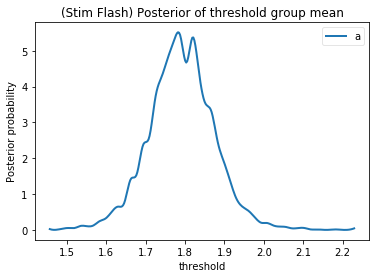

In [88]:
a = flash_stim.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of threshold group mean')
plt.show()

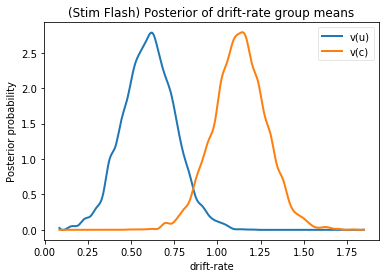

In [89]:
v_u, v_c = flash_stim.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of drift-rate group means')
plt.show()

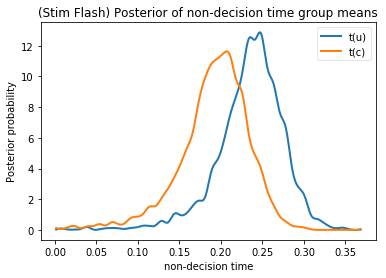

In [90]:
t_u, t_c = flash_stim.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of non-decision time group means')
plt.show()

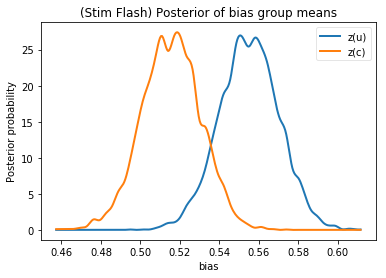

In [91]:
z_u, z_c = flash_stim.nodes_db.node[['z(u)', 'z(c)']]
hddm.analyze.plot_posterior_nodes([z_u, z_c])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of bias group means')
plt.show()

### Posterior Predictive Check (Stimulus-coded Flash)

In [52]:
fppc2 = hddm.utils.post_pred_gen(flash_stim)

 [------------------105%------------------] 59 of 56 complete in 2478.1 sec

In [55]:
fppc_compare2 = hddm.utils.post_pred_stats(stim_f, fppc2)
print(fppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.786028  0.128655  0.000062  0.016614     True   
mean_ub   0.855433  0.920047  0.269142  0.004175  0.076612     True   
std_ub    0.665953  0.523266  0.216317  0.020360  0.067152     True   
10q_ub    0.389500  0.440812  0.129023  0.002633  0.019280     True   
30q_ub    0.537021  0.588942  0.171498  0.002696  0.032107     True   
50q_ub    0.665879  0.767402  0.229415  0.010307  0.062938     True   
70q_ub    0.849032  1.032765  0.323504  0.033758  0.138412     True   
90q_ub    1.449996  1.576562  0.532017  0.016019  0.299061     True   
mean_lb  -1.085988 -0.926923  0.325185  0.025302  0.131047     True   
std_lb    0.903215  0.453136  0.279067  0.202571  0.280450     True   
10q_lb    0.444976  0.514913  0.209170  0.004891  0.048643     True   
30q_lb    0.630831  0.646152  0.243953  0.000235  0.059748     True   
50q_lb

### Parameter Recovery (Stim-coded Flash)

In [115]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 0.511692}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 1 - 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 1 - 0.511692}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 1
b2['stimCode'] = 0
fsyndata2 = b1.append(b2, ignore_index = True)

1, 0

In [119]:
flash_stim = hddm.HDDMStimCoding(fsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param = 'v')
flash_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 747.4 sec

In [64]:
#fparamrec2.print_stats()

a: 2.4% diff

v(c): 0.4% diff

v(u): 6.7% diff

t(c): 14% diff

t(u): 9.8% diff

z(c): 7.3% diff

z(u): 5.7% diff

0, 1

In [121]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 0.511692}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 1 - 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 1 - 0.511692}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 0
b2['stimCode'] = 1
fsyndata2 = b1.append(b2, ignore_index = True)

In [ ]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param='v')
bparamrec2.sample(7000, burn=500)

In [ ]:
fparamrec2.print_stats()

### Stim-coded beep model

In [344]:
beep_stim = hddm.HDDMStimCoding(stim_b, include=['a', 'v', 't', 'z', 'p_outlier'], depends_on={'v': ['trialtype'], 't': ['trialtype'], 'z': ['trialtype']}, stim_col='stimCode', split_param='v')
beep_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 676.4 sec

In [68]:
#beep_stim.print_stats()

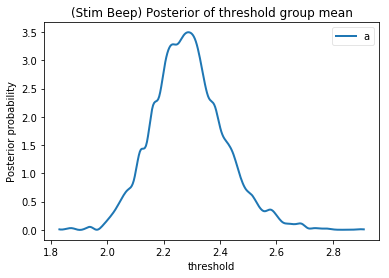

In [346]:
a = beep_stim.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of threshold group mean')
plt.show()

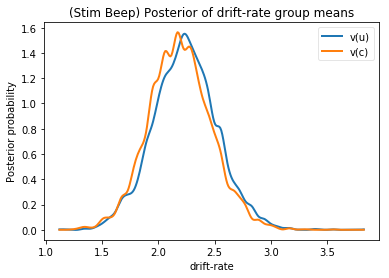

In [347]:
v_u, v_c = beep_stim.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of drift-rate group means')
plt.show()

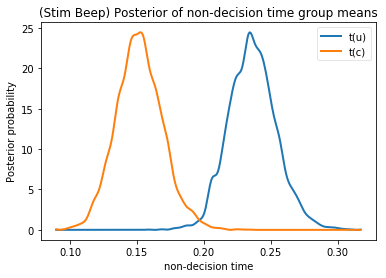

In [348]:
t_u, t_c = beep_stim.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of non-decision time group means')
plt.show()

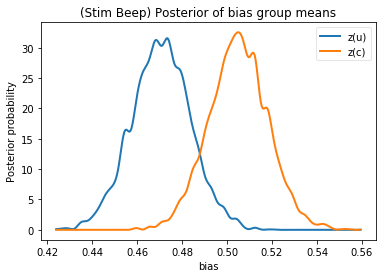

In [349]:
z_u, z_c = beep_stim.nodes_db.node[['z(u)', 'z(c)']]
hddm.analyze.plot_posterior_nodes([z_u, z_c])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of bias group means')
plt.show()

## Posterior Predictive Check (Beep)

### Stim-coded Beep

In [108]:
bppc2 = hddm.utils.post_pred_gen(beep_stim)

 [------------------105%------------------] 59 of 56 complete in 3179.1 sec

In [109]:
bppc_compare2 = hddm.utils.post_pred_stats(stim_b, bppc2)
print(bppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.932646  0.071991  0.000011  0.005194     True   
mean_ub   0.811824  0.850116  0.267236  0.001466  0.072882     True   
std_ub    0.705276  0.482211  0.240484  0.049758  0.107591     True   
10q_ub    0.364230  0.400436  0.098640  0.001311  0.011041     True   
30q_ub    0.491178  0.546768  0.144118  0.003090  0.023860     True   
50q_ub    0.613278  0.715256  0.212955  0.010399  0.055749     True   
70q_ub    0.787827  0.959066  0.323825  0.029323  0.134185     True   
90q_ub    1.393924  1.459930  0.569839  0.004357  0.329074     True   
mean_lb  -1.516434 -0.878211  0.420975  0.407328  0.584548     True   
std_lb    1.449590  0.314117  0.352153  1.289299  1.413310    False   
10q_lb    0.498767  0.597810  0.318249  0.009809  0.111092     True   
30q_lb    0.745144  0.695967  0.338326  0.002418  0.116883     True   
50q_lb

## Parameter Recovery (Beep)

### Stim-coded beep

In [100]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034},
                                                  'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 1 - 0.471034},
                                                  'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 1 - 0.504701}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 1
b2['stimCode'] = 0
bsyndata2 = b1.append(b2, ignore_index = True)

In [101]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param='v')
bparamrec2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 791.8 sec

In [70]:
#bparamrec2.print_stats()

# Old models (ignore)

## Vary by unisensory/congruent and 2/3 flashes

In [79]:
flash_acc2 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 637.8 sec

In [73]:
#flash_acc2.print_stats()

In [90]:
fppc2 = hddm.utils.post_pred_gen(flash_acc2)

 [------------------105%------------------] 59 of 56 complete in 2396.0 sec

In [93]:
fppc_compare2 = hddm.utils.post_pred_stats(model_f, fppc2)
print(fppc_compare2)

          observed      mean       std           SEM       MSE credible  \
stat                                                                      
accuracy  0.778135  0.785527  0.226781  5.464787e-05  0.051484     True   
mean_ub   0.855433  0.824403  0.255163  9.629046e-04  0.066071     True   
std_ub    0.665953  0.400850  0.206955  7.027969e-02  0.113110     True   
10q_ub    0.389500  0.454602  0.121276  4.238339e-03  0.018946     True   
30q_ub    0.537021  0.571205  0.157151  1.168506e-03  0.025865     True   
50q_ub    0.665879  0.709956  0.212699  1.942770e-03  0.047184     True   
70q_ub    0.849032  0.913406  0.304318  4.144056e-03  0.096754     True   
90q_ub    1.449996  1.326561  0.502026  1.523606e-02  0.267267     True   
mean_lb  -1.085988 -0.842109  0.300749  5.947689e-02  0.149927     True   
std_lb    0.903215  0.342147  0.269634  3.147972e-01  0.387500     True   
10q_lb    0.444976  0.530092  0.199483  7.244650e-03  0.047038     True   
30q_lb    0.630831  0.630

In [25]:
beep_acc2 = hddm.HDDM(model_b, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
beep_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7001 of 7000 complete in 683.9 sec

In [71]:
#beep_acc2.print_stats()

In [27]:
bppc2 = hddm.utils.post_pred_gen(beep_acc2)

 [------------------105%------------------] 59 of 56 complete in 2853.8 sec

In [29]:
bppc_compare2 = hddm.utils.post_pred_stats(model_b, bppc2)
print(bppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.958033  0.098906  0.000485  0.010268     True   
mean_ub   0.811824  0.747368  0.257363  0.004155  0.070390     True   
std_ub    0.705276  0.354193  0.215075  0.123259  0.169517     True   
10q_ub    0.364230  0.409418  0.100310  0.002042  0.012104     True   
30q_ub    0.491178  0.525384  0.142563  0.001170  0.021494     True   
50q_ub    0.613278  0.653432  0.203826  0.001612  0.043157     True   
70q_ub    0.787827  0.833393  0.303793  0.002076  0.094366     True   
90q_ub    1.393924  1.197600  0.526981  0.038543  0.316252     True   
mean_lb  -1.516434 -0.882663  0.422287  0.401666  0.579992     True   
std_lb    1.449590  0.273431  0.354659  1.383349  1.509132    False   
10q_lb    0.498767  0.637923  0.314918  0.019364  0.118538     True   
30q_lb    0.745144  0.722800  0.329991  0.000499  0.109393     True   
50q_lb

## Vary by unisensory/congruent and 2/3 flashes, add back bound sep

In [14]:
flash_acc3 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'a': ['type', 'stimName'], 'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc3.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 724.6 sec

## Old Figure Code

In [ ]:
from matplotlib.offsetbox import AnchoredText
#for i in np.arange(max(unif['subj_idx'])):
#    plotbars(unif, unib, congrf, congrb, "(Subj " + str(int(i + 1)) + ") % Correct", 
#             "(Subj " + str(int(i + 1)) + ") mean RT", int(i + 1))

#plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")
def plotbars(flashuni, beepuni, flashcongr, beepcongr, title, width, subjid = -1):
    if (subjid != -1):
        flashuni = flashuni.loc[flashuni['subj_idx'] == subjid]
        beepuni = beepuni.loc[beepuni['subj_idx'] == subjid]
        flashcongr = flashcongr.loc[flashcongr['subj_idx'] == subjid]
        beepcongr = beepcongr.loc[beepcongr['subj_idx'] == subjid]
        
    ## % correct plot
    flashuniacc = flashuni['acc'].mean()
    beepuniacc = beepuni['acc'].mean()
    flashcongracc = flashcongr['acc'].mean()
    beepcongracc = beepcongr['acc'].mean()
    #allcongracc = (flashcongracc + beepcongracc) / 2
    
    if(subjid == -1):
        fig = plt.figure(figsize=(8,5)) 
        ax = fig.add_subplot(111)
    else:
        fig = plt.figure(figsize=(12,5)) 
        ax = fig.add_subplot(121)
    ax.set_xlabel('condition', fontsize = 15)
    ax.set_ylabel('% accurate', fontsize = 15)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)

    objects = ('Unisensory \nVisual',  'Congruent \nVisual', 'Unisensory \nAuditory', 'Congruent \nAuditory')
    #y_pos = np.arange(len(objects))
    performance = [flashuniacc, flashcongracc, beepuniacc, beepcongracc]
    
    def label_diff(i,j,text,X,Y,k = 1):
        x = (X[i]+X[j])/2
        y = 1.05*max(Y[i], Y[j])
        print(X[i], X[j], (X[i]+X[j])/2)
        print(x, y)
        dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':20,'shrinkB':20,'linewidth':1}
        if k == 0:
            ax.annotate(text, xy=(x,y+0.187), zorder=10, ha= 'center', size = 15)
            ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        else:
            ax.annotate(text, xy=(x + 0.5,y+0.25), zorder=10, ha= 'center', size = 15)
            ax.annotate('', xy=(X[i], y - 0.25), xytext=(X[j], y - 0.25), arrowprops=props)
        
    
    

    if(subjid == -1):
        flashuniaccerr = calcstderr(flashuni, 'acc')
        beepuniaccerr = calcstderr(beepuni, 'acc')
        flashcongraccerr = calcstderr(flashcongr, 'acc')
        beepcongraccerr = calcstderr(beepcongr, 'acc')
        #allcongraccerr = (flashcongraccerr + beepcongraccerr) / 2
        y_pos = [0,1,3,4]
        plt.bar(y_pos, performance, yerr=[flashuniaccerr, flashcongraccerr, beepuniaccerr, beepcongraccerr], 
                color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        label_diff(0, 1, "***", range(5), performance, 0)
        

        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        plt.ylim([0, 1.5])
    else:
        y_pos = [0,1,3,4]
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        plt.ylim([0,1])
    plt.xticks(y_pos, objects)
    
    plt.tight_layout()
    if (subjid == -1):
        plt.savefig('accuracy.png')
    
    ## mean rt plot, only want accurate trials
    flashunirt = flashuni.loc[flashuni['acc'] == 1]['rt'].mean()
    beepunirt = beepuni.loc[beepuni['acc'] == 1]['rt'].mean()
    flashcongrrt = flashcongr.loc[flashcongr['acc'] == 1]['rt'].mean()
    beepcongrrt = beepcongr.loc[beepcongr['acc'] == 1]['rt'].mean()
    #allcongrrt = (flashcongrrt + beepcongrrt) / 2
    

    if (subjid == -1):
        fig = plt.figure(figsize=(8,5)) 
        ax = fig.add_subplot(111)
    else:
        ax = fig.add_subplot(122)
    ax.set_xlabel('condition', fontsize = 15)
    ax.set_ylabel('response time (s)', fontsize = 15)
    objects = ('Unisensory \nVisual',  'Congruent \nVisual', 'Unisensory \nAuditory', 'Congruent \nAuditory')
    y_pos = [0,1,3,4] 
    performance = [flashunirt, flashcongrrt, beepunirt, beepcongrrt]

    if (subjid == -1):
        '''
        flashunirterr = calcstderr(flashuni, 'rt')
        beepunirterr = calcstderr(beepuni, 'rt')
        flashcongrrterr = calcstderr(flashcongr, 'rt')
        beepcongrrterr = calcstderr(beepcongr, 'rt')
        #allcongrrterr = (flashcongrrterr + beepcongrrterr) / 2
        plt.bar(y_pos, performance, yerr=[flashunirterr, flashcongrrterr, beepunirterr, beepcongrrterr], 
                color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        label_diff(0, 1, "***", range(5), performance)
        label_diff(3, 4, "***", range(5), [flashunirt, flashcongrrt, 0, beepunirt, beepcongrrt])
        
        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        '''
        colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
        box_dict = plt.boxplot([flashuni['rt'], flashcongr['rt'], beepuni['rt'], beepcongr['rt']], positions = [0,1,3,4], showfliers = False)
        for item in ['whiskers', 'caps']:
            for sub_items, color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
                plt.setp(sub_items, color=color)
        for item in ['boxes', 'medians', 'means', 'fliers']:
            for sub_item, color in zip(box_dict[item], colors):
                plt.setp(sub_item, color=color, markeredgecolor=color)
        '''
        label_diff(0, 1, "***", range(5), [np.quantile(flashuni['rt'], 0.75) + 1.5*(np.quantile(flashuni['rt'], 0.75) - np.quantile(flashuni['rt'], 0.25)), 
                                           np.quantile(flashcongr['rt'], 0.75) + 1.5*(np.quantile(flashcongr['rt'], 0.75) - np.quantile(flashcongr['rt'], 0.25)), 0, 
                                           np.quantile(beepuni['rt'], 0.75) + 1.5*(np.quantile(beepuni['rt'], 0.75) - np.quantile(beepuni['rt'], 0.25)), 
                                           np.quantile(beepcongr['rt'], 0.75) + 1.5*(np.quantile(beepcongr['rt'], 0.75) - np.quantile(beepcongr['rt'], 0.25))])
        label_diff(3, 4, "***", range(5), [np.quantile(flashuni['rt'], 0.75) + 1.5*(np.quantile(flashuni['rt'], 0.75) - np.quantile(flashuni['rt'], 0.25)), 
                                           np.quantile(flashcongr['rt'], 0.75) + 1.5*(np.quantile(flashcongr['rt'], 0.75) - np.quantile(flashcongr['rt'], 0.25)), 0, 
                                           np.quantile(beepuni['rt'], 0.75) + 1.5*(np.quantile(beepuni['rt'], 0.75) - np.quantile(beepuni['rt'], 0.25)), 
                                           np.quantile(beepcongr['rt'], 0.75) + 1.5*(np.quantile(beepcongr['rt'], 0.75) - np.quantile(beepcongr['rt'], 0.25))])
        
        at = AnchoredText("*          p < 0.05\n**         p < 0.01\n***       p < 0.001",
                      prop=dict(size=15), frameon=True,
                      loc='upper right',
                      )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        '''
        plt.tight_layout()
        plt.gcf().subplots_adjust(bottom=0.25)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'], ecolor='black', capsize=10, width = width)
        plt.suptitle(title, fontsize = 15)
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.xticks(y_pos, objects)
    plt.ylim([0,3])
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    plt.tick_params(axis = 'x', labelsize = 12)
    plt.tick_params(axis = 'y', labelsize = 12)
    
    if (subjid == -1):
        plt.savefig('mean_rt.png')
    else:
        plt.savefig('subj' + str(int(i + 1)) + '.png')
        print('subj ', subjid,  beepuniacc, beepcongracc)
